# Brazilian E-Commerce Analysis

This is a Brazilian ecommerce public dataset of orders made at Olist Store. The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers. We also released a geolocation dataset that relates Brazilian zip codes to lat/lng coordinates.

This is real commercial data, it has been anonymised, and references to the companies and partners in the review text have been replaced with the names of Game of Thrones great houses.

**Context**

This dataset was generously provided by Olist, the largest department store in Brazilian marketplaces. Olist connects small businesses from all over Brazil to channels without hassle and with a single contract. Those merchants are able to sell their products through the Olist Store and ship them directly to the customers using Olist logistics partners. See more on our website: www.olist.com

After a customer purchases the product from Olist Store a seller gets notified to fulfill that order. Once the customer receives the product, or the estimated delivery date is due, the customer gets a satisfaction survey by email where he can give a note for the purchase experience and write down some comments.

**Attention**

1. An order might have multiple items.
2. Each item might be fulfilled by a distinct seller.
3. All text identifying stores and partners where replaced by the names of Game of Thrones great houses.

**Example**

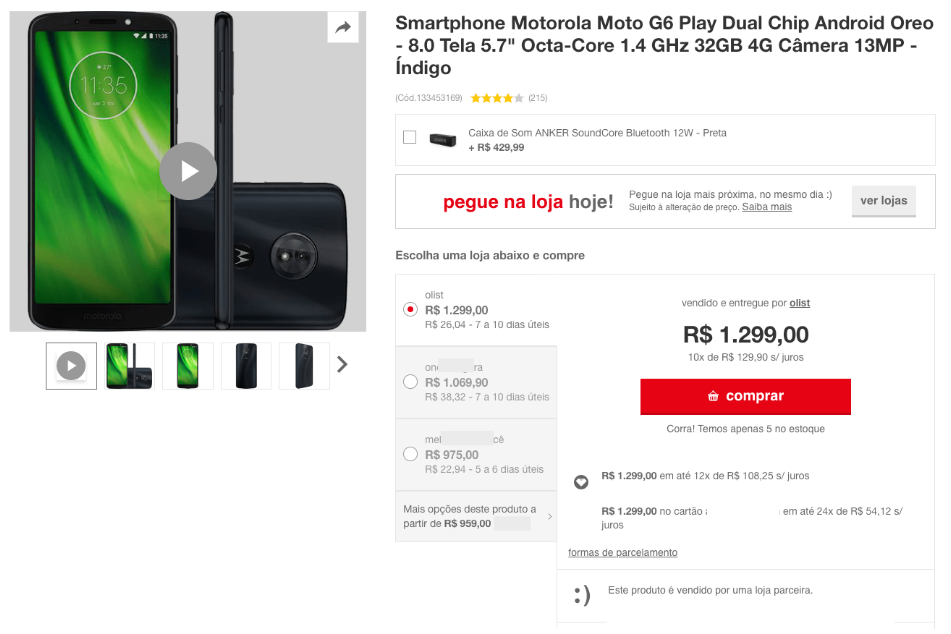

**Schema Dataset**

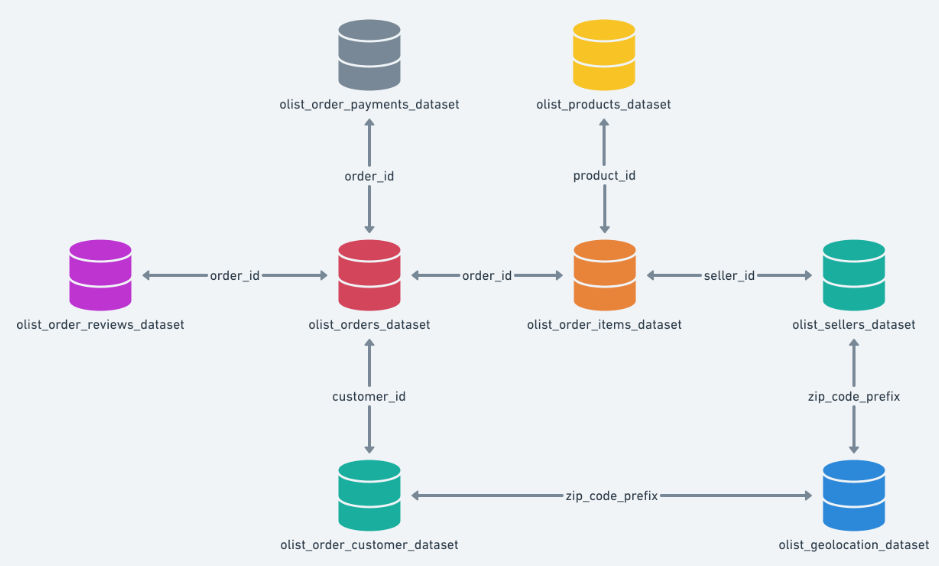

## 1. Data Understanding

At this stage, we aim to gain insights from the dataset through a comprehensive analysis.  
EDA is conducted using two main approaches:


**Import Library**

In [1]:
import pandas as pd

In [2]:
orders = pd.read_csv("data/olist_orders_dataset.csv")
order_items = pd.read_csv("data/olist_order_items_dataset.csv")
products = pd.read_csv("data/olist_products_dataset.csv")
sellers = pd.read_csv("data/olist_sellers_dataset.csv")
customers = pd.read_csv("data/olist_customers_dataset.csv")
payments = pd.read_csv("data/olist_order_payments_dataset.csv")
reviews = pd.read_csv("data/olist_order_reviews_dataset.csv")
geolocation = pd.read_csv("data/olist_geolocation_dataset.csv")

### **1.1 Olist Orders Dataset**

This table contains **high-level information about customer orders**.  
Each row represents a single order, including its status, timestamps (purchase, approval, delivery), and estimated delivery date.

| Column | Description |
|--------|-------------|
| `order_id` | Unique ID for each order. |
| `customer_id` | ID of the customer who placed the order. |
| `order_status` | Status of the order (delivered, shipped, canceled, etc.). |
| `order_purchase_timestamp` | Timestamp when the order was placed. |
| `order_approved_at` | Timestamp when the order was approved. |
| `order_delivered_carrier_date` | Date when the order was handed over to the carrier. |
| `order_delivered_customer_date` | Date when the order was delivered to the customer. |
| `order_estimated_delivery_date` | Estimated delivery date for the order. |



In [3]:
orders.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

In [4]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


**Missing Values:**  
This table has missing values in `order_approved_at` (160), `order_delivered_carrier_date` (1,783), and `order_delivered_customer_date` (2,965).

### **1.2 Order Item**

This table contains **detailed product-level information for each order**.  
Each row corresponds to one product purchased in an order, including product ID, seller ID, price, and freight value.

| Column | Description |
|--------|-------------|
| `order_id` | Order ID associated with the item. |
| `order_item_id` | Sequential number of the item in the order. |
| `product_id` | Unique product ID. |
| `seller_id` | Unique seller ID. |
| `shipping_limit_date` | Deadline for the seller to ship the item. |
| `price` | Price of the product. |
| `freight_value` | Freight cost for the product. |

In [5]:
order_items.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

In [6]:

order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [7]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


**Missing Values:**  
No missing values in this table.

### **1.3 Product**

This table contains **information and specifications of each product** sold on the platform, such as weight, dimensions, and category.

| Column | Description |
|--------|-------------|
| `product_id` | Unique product ID. |
| `product_category_name` | Category name of the product. |
| `product_name_lenght` | Number of characters in the product name. |
| `product_description_lenght` | Number of characters in the product description. |
| `product_photos_qty` | Number of photos of the product. |
| `product_weight_g` | Product weight (grams). |
| `product_length_cm` | Product length (cm). |
| `product_height_cm` | Product height (cm). |
| `product_width_cm` | Product width (cm). |

In [8]:
products.head()

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0  
3             371.0               26.0                4.0              26.0  
4             625.0               20.0               17.0              13.0

In [9]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [10]:
products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

**Missing Values:**  
`product_category_name`, `product_name_lenght`, `product_description_lenght`, and `product_photos_qty` each have 610 missing values.  
`product_weight_g`, `product_length_cm`, `product_height_cm`, and `product_width_cm` each have 2 missing values.


### **1.4 Sellers**


This table contains **information about sellers** on the platform, including their location details.

| Column | Description |
|--------|-------------|
| `seller_id` | Unique seller ID. |
| `seller_zip_code_prefix` | ZIP code prefix of the seller. |
| `seller_city` | City of the seller. |
| `seller_state` | State of the seller. |

In [11]:
sellers.head()

seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP

In [12]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [13]:
sellers.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

**Missing Values:**  
No missing values in this table.

### **1.5 Customers**

This table contains **customer demographic and location information**.  
Each customer may appear multiple times if they placed multiple orders.

| Column | Description |
|--------|-------------|
| `customer_id` | Unique customer ID (per transaction). |
| `customer_unique_id` | Unique customer ID (per individual). |
| `customer_zip_code_prefix` | ZIP code prefix of the customer. |
| `customer_city` | City of the customer. |
| `customer_state` | State of the customer. |

In [14]:
customers.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

In [15]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


**Missing Values:**  
No missing values in this table.

### **1.6 Payments**

This table contains **payment transaction details** for each order.

| Column | Description |
|--------|-------------|
| `order_id` | Order ID associated with the payment. |
| `payment_sequential` | Payment sequence number for the order. |
| `payment_type` | Payment method (credit card, boleto, etc.). |
| `payment_installments` | Number of payment installments. |
| `payment_value` | Total payment amount. |

In [16]:
payments.head()

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

In [17]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


**Missing Values:**  
No missing values in this table.

### **1.7 Reviews**

This table contains **customer feedback and reviews** for orders.  
It includes review scores, messages, and timestamps.

| Column | Description |
|--------|-------------|
| `review_id` | Unique review ID. |
| `order_id` | Order ID associated with the review. |
| `review_score` | Score of the review (1–5). |
| `review_comment_title` | Title of the review comment. |
| `review_comment_message` | Content of the review comment. |
| `review_creation_date` | Date the review was created. |
| `review_answer_timestamp` | Date the review was answered. |

In [18]:
reviews.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN           2018-01-18   
1                                                NaN           2018-03-10   
2                                                NaN           2018-02-17   
3     I received it well before the stipulated time.           2017-04-21   
4  Congratulations Lannister stores I loved shopp...           2018-03-01   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

In [19]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_comment_title     11711 non-null   object
 4   review_comment_message   41725 non-null   object
 5   review_creation_date     100000 non-null  object
 6   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [20]:
reviews.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       88289
review_comment_message     58275
review_creation_date           0
review_answer_timestamp        0
dtype: int64

**Missing Values:**  
`review_comment_title` has 87,656 missing values and `review_comment_message` has 58,247 missing values.


### **1.8 Geolocation**

This table contains **geographical data for each ZIP code prefix**, including latitude and longitude.

| Column | Description |
|--------|-------------|
| `geolocation_zip_code_prefix` | ZIP code prefix of the location. |
| `geolocation_lat` | Latitude coordinate. |
| `geolocation_lng` | Longitude coordinate. |
| `geolocation_city` | City name. |
| `geolocation_state` | State name. |

In [21]:
geolocation.head()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP

In [22]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


**Missing Values:**  
No missing values in this table.

## **2. Exploratory Data Analysis**

At this stage, we aim to gain insights from the dataset through a comprehensive analysis.  
EDA is conducted using two main approaches:

### **2.1 EDA per Table (Dataset-Level EDA)**
- Analyze each table individually to understand the structure, data types, value distribution, and relationships between columns.  
- Perform checks for **missing values**, **duplicate records**, **outliers**, and overall data consistency for each table:  
  - Orders  
  - Customers  
  - Sellers  
  - Products  
  - Payments  
  - Reviews  
  - Geolocation  
- Provide an overview of the dataset’s quality and completeness before deeper analysis.

#### 2.1.1 Orders Table

**Conclusion** : 
- No duplicate values were found in the dataset.  
- The majority of orders (around **90%**) have a status of **Delivered**.  

In [23]:
orders.duplicated(subset='order_id').sum()

0

In [24]:
order_count = orders['order_status'].value_counts()
order_count

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

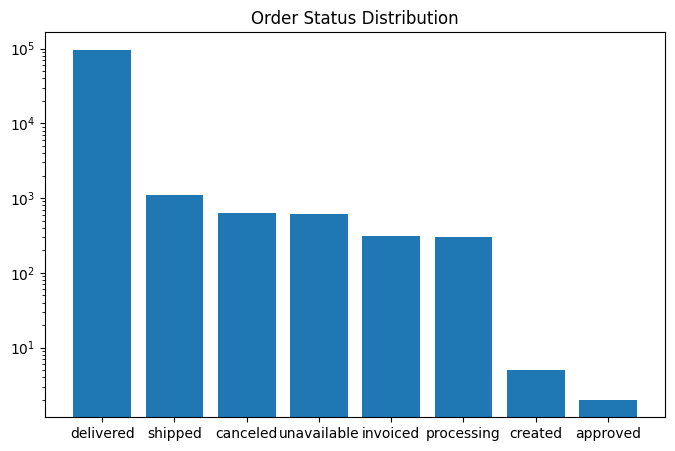

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(order_count.index, order_count.values)
plt.title("Order Status Distribution")
plt.yscale('log')
plt.show()

*Insight :*
- Insight: The majority of `order status` are in **Delivered** status, accounting for over 90% of all orders.

#### 2.1.2 Orders Item Table

**Conclusion** : 
- No duplicate values or significant anomalies were found in the dataset.  
- Most numerical columns contain outliers exceeding the upper bound or third quartile (Q3).  

In [26]:
order_items.describe()

order_item_id          price  freight_value
count  112650.000000  112650.000000  112650.000000
mean        1.197834     120.653739      19.990320
std         0.705124     183.633928      15.806405
min         1.000000       0.850000       0.000000
25%         1.000000      39.900000      13.080000
50%         1.000000      74.990000      16.260000
75%         1.000000     134.900000      21.150000
max        21.000000    6735.000000     409.680000

In [27]:
order_items['order_item_id'].value_counts()

order_item_id
1     98666
2      9803
3      2287
4       965
5       460
6       256
7        58
8        36
9        28
10       25
11       17
12       13
13        8
14        7
15        5
16        3
17        3
18        3
19        3
20        3
21        1
Name: count, dtype: int64

**Outlier at Numeric Column**

In [28]:

import seaborn as sns

def plot_outliers(data, column):

    col_data = data[column].dropna()

    plt.figure(figsize=(8, 5))
    sns.boxplot(x=col_data, color="skyblue")

    plt.title(f"Outlier Detection for '{column}'", fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

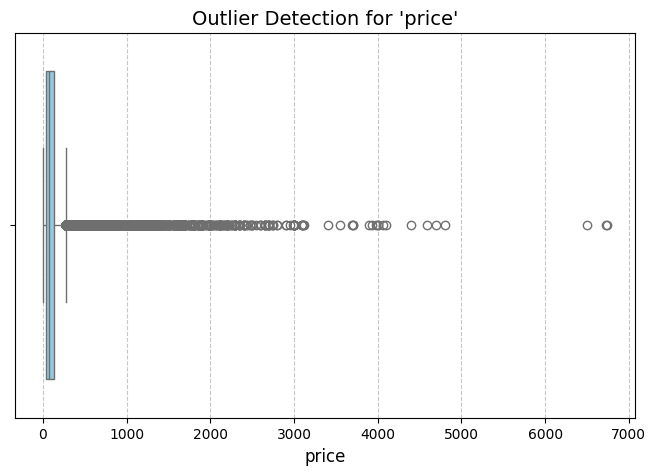

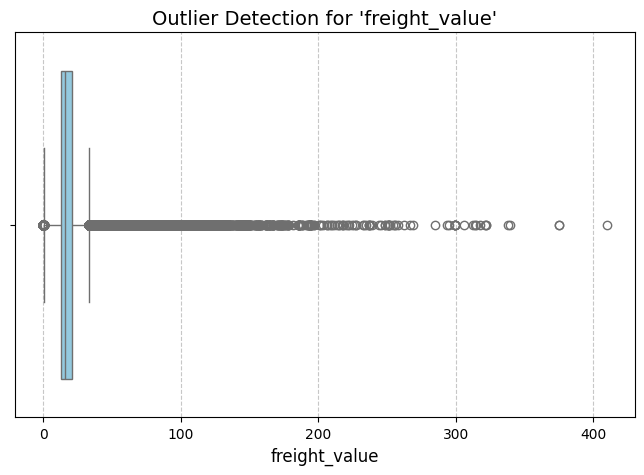

In [29]:
for col in ['price', 'freight_value']:
    plot_outliers(order_items, col)

#### 2.1.3 Product Table

**Conclusion** :
- No duplicate values or irrelevant/anomalous data were found in the dataset.  
- The majority of products sold belong to the **"cama_mesa_banho"** category, accounting for **14.6%** of total products sold.  
- Most product listings include **only one product image**.  
- The distribution of product dimensions (weight, length, width, and height) is **right-skewed**, indicating that most items are relatively small/light, with a few significantly larger ones.  
- The distribution of product name lengths is **left-skewed**, with most product names ranging between **40–60 characters**.  
- The distribution of product descriptions is **right-skewed**, with most products having **short descriptions (0–1000 characters)**, and a few containing very long descriptions.  
- Outliers exceeding the **upper bound (Q3)** were identified in most numerical columns. However, for **product_name_length**, outliers appear **below the lower bound (Q1)** instead.

In [30]:
products.duplicated(subset='product_id').sum()

0

In [31]:
products.describe()

product_name_lenght  product_description_lenght  product_photos_qty  \
count         32341.000000                32341.000000        32341.000000   
mean             48.476949                  771.495285            2.188986   
std              10.245741                  635.115225            1.736766   
min               5.000000                    4.000000            1.000000   
25%              42.000000                  339.000000            1.000000   
50%              51.000000                  595.000000            1.000000   
75%              57.000000                  972.000000            3.000000   
max              76.000000                 3992.000000           20.000000   

       product_weight_g  product_length_cm  product_height_cm  \
count      32949.000000       32949.000000       32949.000000   
mean        2276.472488          30.815078          16.937661   
std         4282.038731          16.914458          13.637554   
min            0.000000           7.000000           2.000000   
25%          300.000000          18.000000           8.000000   
50%          700.000000          25.000000          13.000000   
75%         1900.000000          38.000000          21.000000   
max        40425.000000         105.000000         105.000000   

       product_width_cm  
count      32949.000000  
mean          23.196728  
std           12.079047  
min            6.000000  
25%           15.000000  
50%           20.000000  
75%           30.000000  
max          118.000000

**Product Category Name**

In [32]:
product_category = products.product_category_name.value_counts().head(10)
product_category

product_category_name
cama_mesa_banho           3029
esporte_lazer             2867
moveis_decoracao          2657
beleza_saude              2444
utilidades_domesticas     2335
automotivo                1900
informatica_acessorios    1639
brinquedos                1411
relogios_presentes        1329
telefonia                 1134
Name: count, dtype: int64

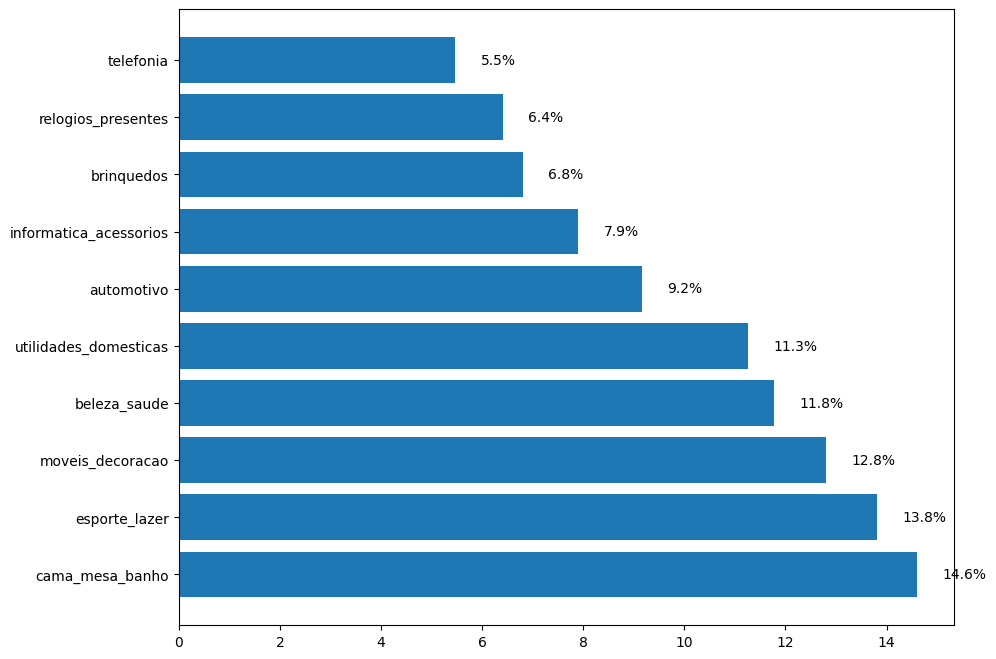

In [33]:
total = product_category.sum()
product_category_pct = (product_category / total) * 100

plt.figure(figsize=(10, 8))
plt.barh(product_category_pct.index, product_category_pct.values)
for index, value in enumerate(product_category_pct.values):
    plt.text(value + 0.5, index, f"{value:.1f}%", va='center')

plt.show()

**Product Photo Qty**

In [34]:
products_photo = products.product_photos_qty.value_counts().head(10)
products_photo

product_photos_qty
1.0     16489
2.0      6263
3.0      3860
4.0      2428
5.0      1484
6.0       968
7.0       343
8.0       192
9.0       105
10.0       95
Name: count, dtype: int64

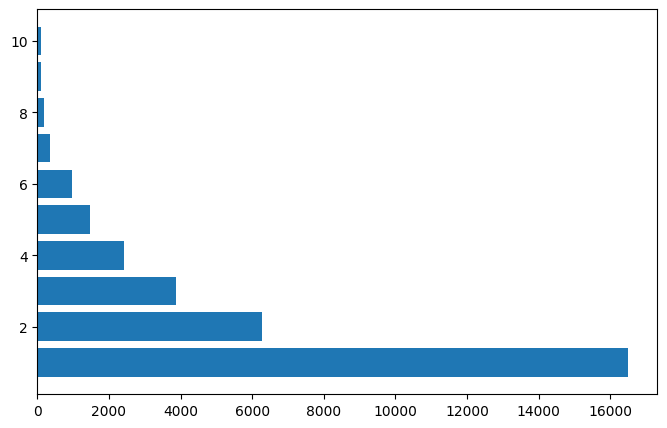

In [35]:
plt.figure(figsize=(8,5))
plt.barh(products_photo.index, products_photo.values)
plt.show()

**Distribution of Product Dimensions and Weight**

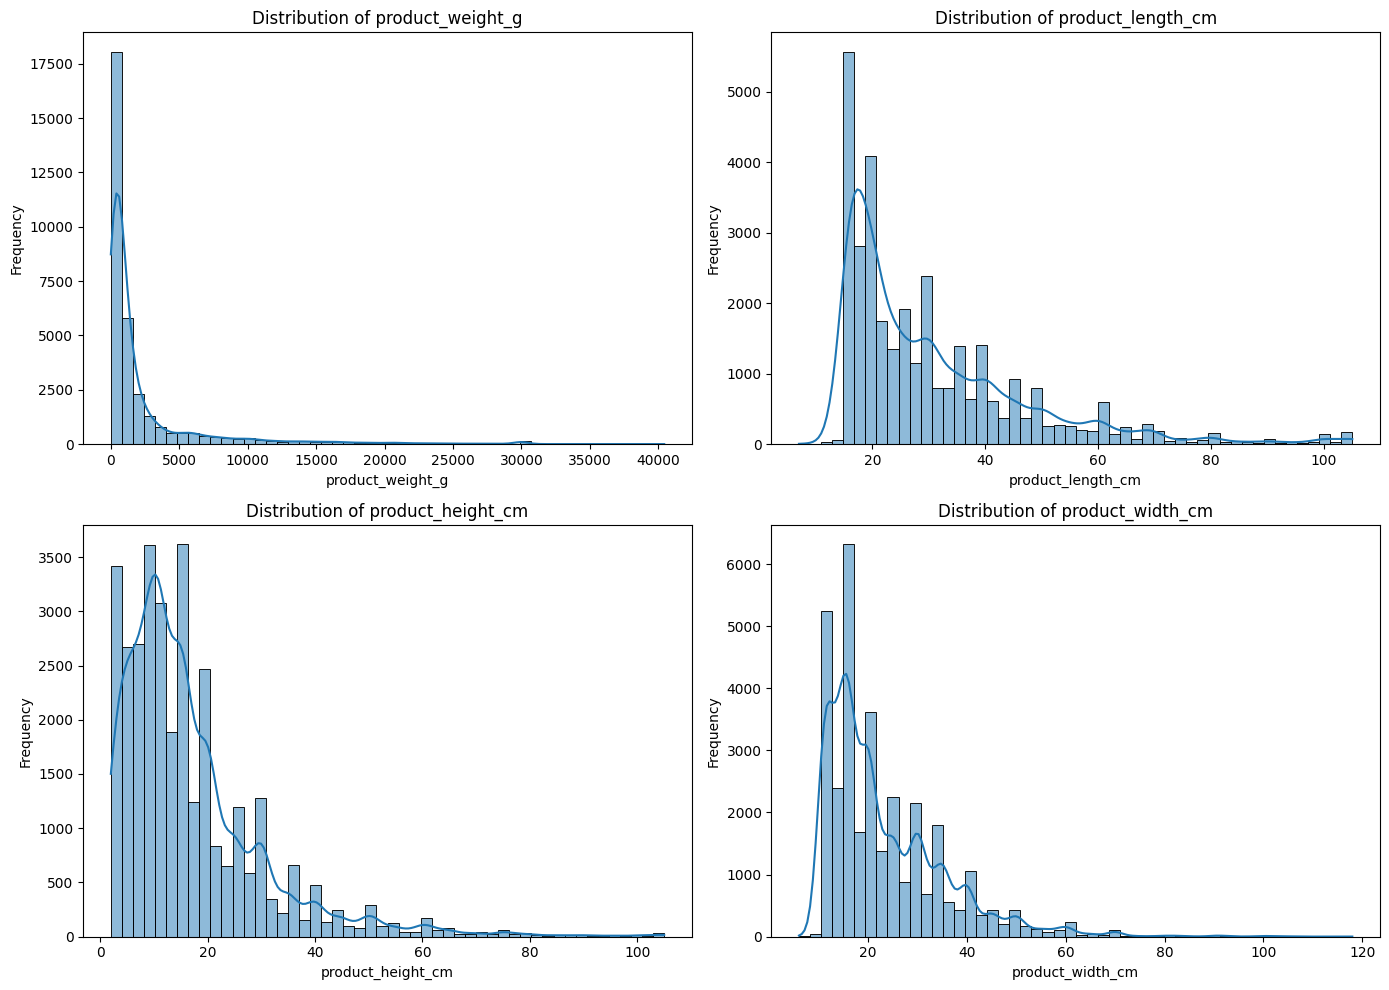

In [36]:
numeric_cols = ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']

plt.figure(figsize=(14, 10))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(products[col], kde=True, bins=50)
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Product Post**

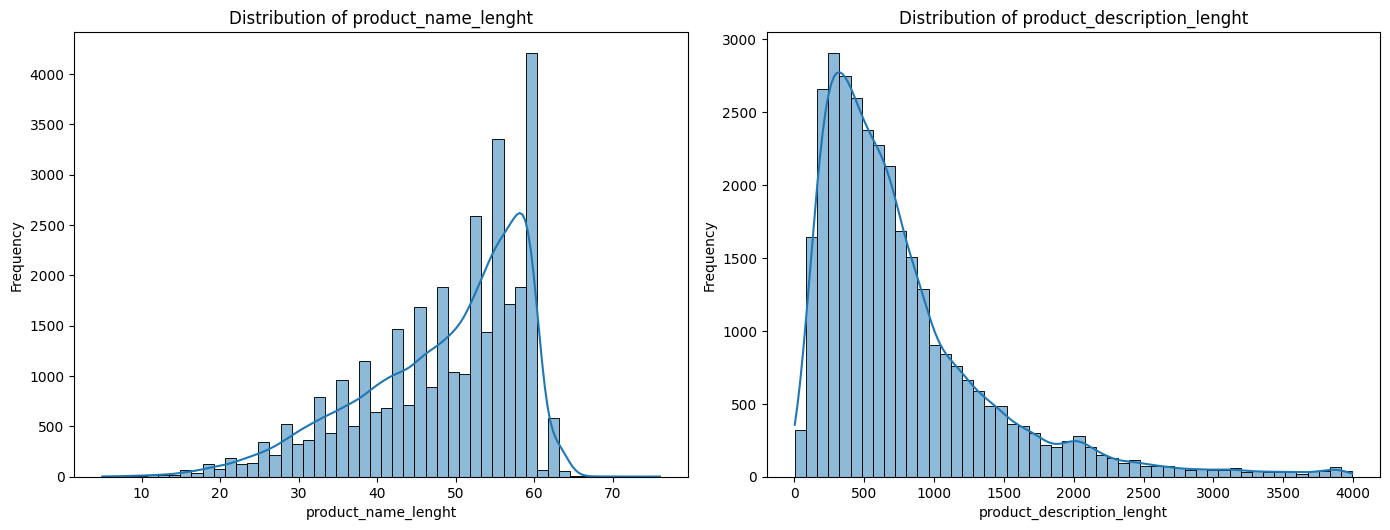

In [37]:
col_bio = ['product_name_lenght', 'product_description_lenght']

plt.figure(figsize=(14, 10))

for i, col in enumerate(col_bio, 1):
    plt.subplot(2, 2, i)
    sns.histplot(products[col], kde=True, bins=50)
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Outlier numeric column in Product Table**

In [38]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


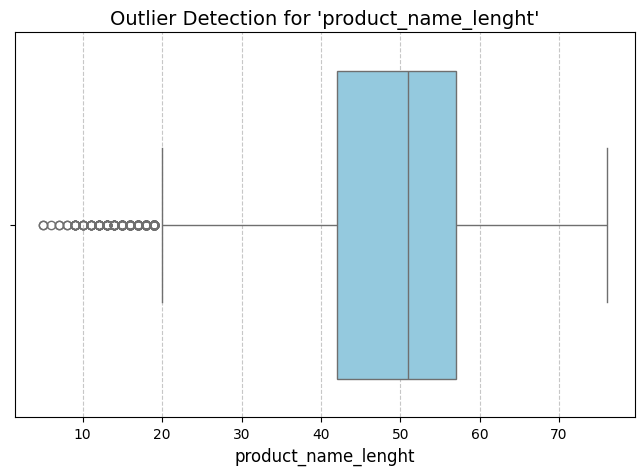

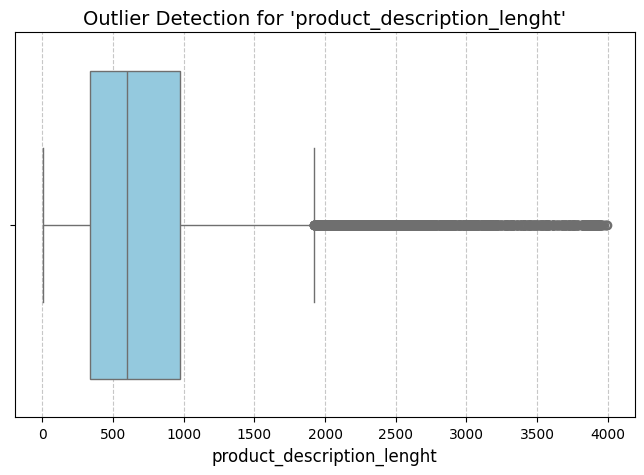

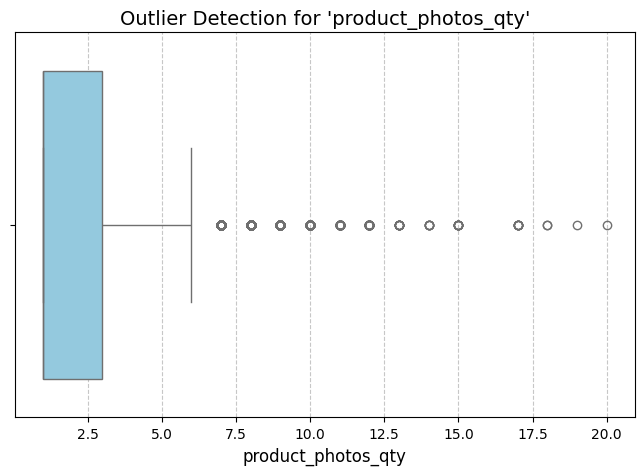

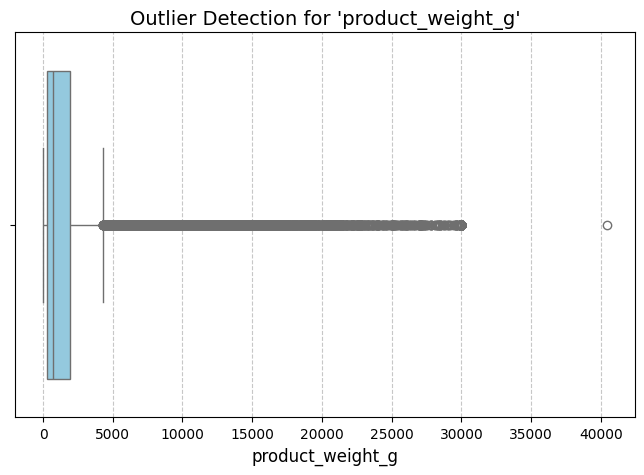

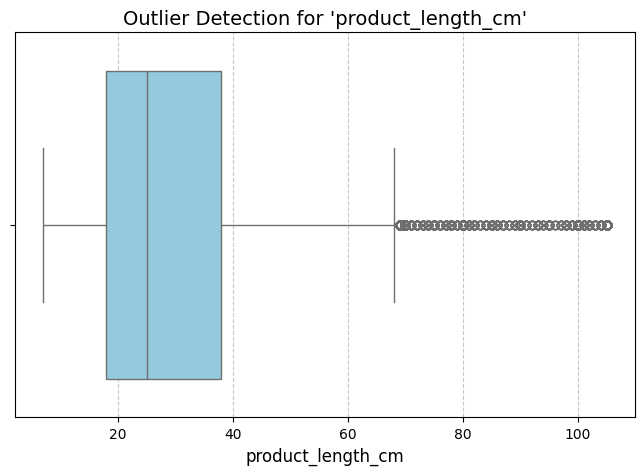

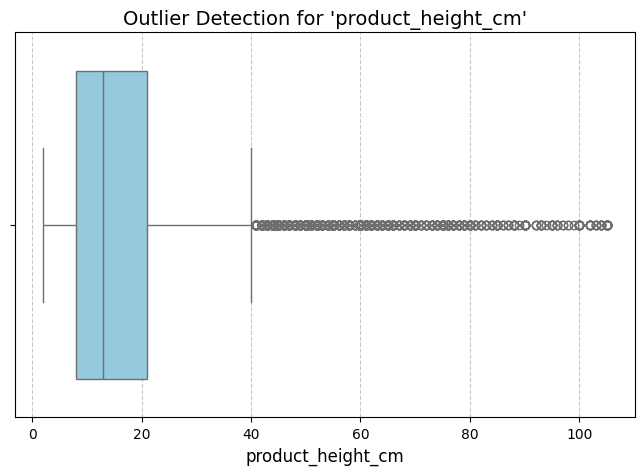

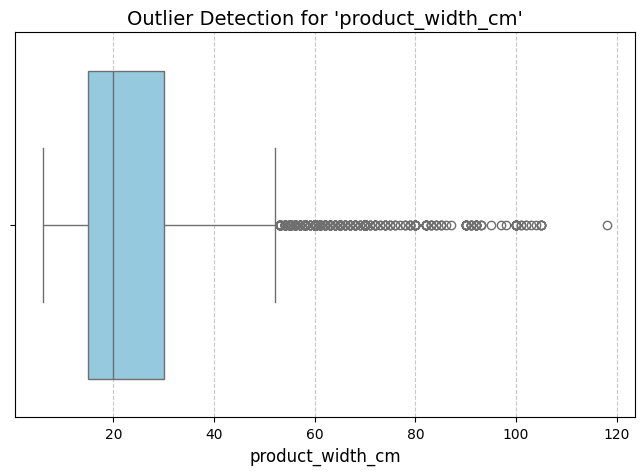

In [39]:
numeric_cols = products.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    plot_outliers(products, col)

#### **2.1.4 sellers** 

**Conclusion** :
- No irrelevant or duplicate data was found in the **sellers** table.  
- No duplicate values were found in the **seller_id** column, indicating that each seller has a **unique identifier** in the dataset.  
- The city with the highest number of sellers is **São Paulo**, followed by **Curitiba**.

In [40]:
sellers.duplicated(subset='seller_id').sum()

0

In [41]:
seller_count = sellers['seller_id'].nunique()
print(seller_count)

3095


In [42]:
seller_city = sellers.seller_city.value_counts().head(10)
seller_city

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
guarulhos          50
ibitinga           49
santo andre        45
campinas           41
maringa            40
Name: count, dtype: int64

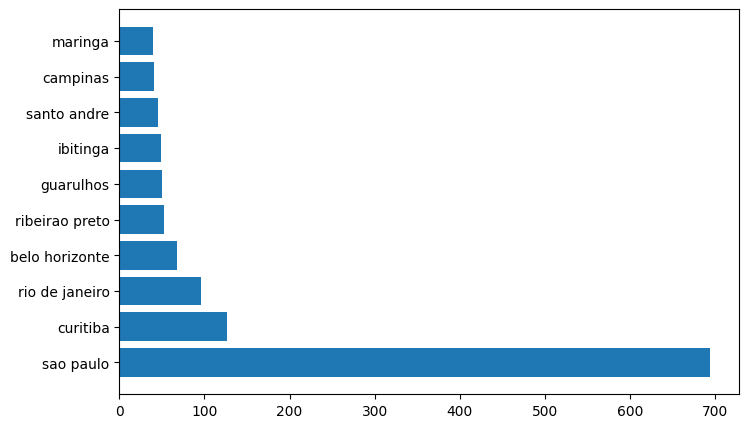

In [43]:
plt.figure(figsize=(8,5))
plt.barh(seller_city.index, seller_city.values)
plt.show()

#### 2.1.5 Customers Table

**Conclusion** :
- There are no duplicate entries in the `customer_id` column, indicating that each customer ID is unique.  
- A total of **96,096 customers** were recorded over the span of two years.  
- **São Paulo** has the highest number of customers compared to other cities.  

In [44]:
customers['customer_id'].nunique()

99441

In [45]:
dup_customers = customers.duplicated(subset='customer_id').sum()
dup_customers

0

In [46]:
customers['customer_unique_id'].nunique()

96096

In [47]:
customer_city = customers.customer_city.value_counts().head(10)
customer_city

customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: count, dtype: int64

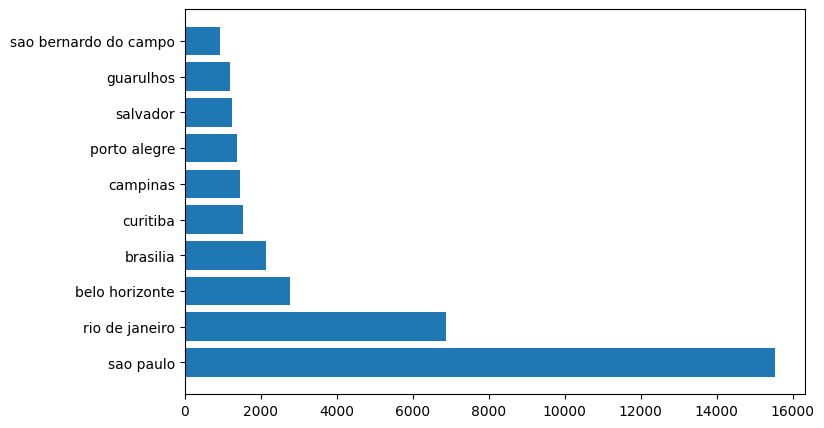

In [48]:
plt.figure(figsize=(8,5))
plt.barh(customer_city.index, customer_city.values)
plt.show()

#### **2.1.6 Payments Table**

**Conclusion** :
- No irrelevant data was found in the analyzed columns.  
- Most customer payments fall within the **0–100** range.  
- The most common payment installment option is a **single payment (1 installment)**.  
- **Credit card** is the most frequently used payment method.  
- While the majority of customers do not use installments, there are still many who choose installment plans, ranging from **2 installments** up to **24 installments**.  

In [49]:
payments.describe()

payment_sequential  payment_installments  payment_value
count       103886.000000         103886.000000  103886.000000
mean             1.092679              2.853349     154.100380
std              0.706584              2.687051     217.494064
min              1.000000              0.000000       0.000000
25%              1.000000              1.000000      56.790000
50%              1.000000              1.000000     100.000000
75%              1.000000              4.000000     171.837500
max             29.000000             24.000000   13664.080000

In [50]:
payments[payments['payment_sequential']== 29] 

order_id  payment_sequential payment_type  \
39108  fa65dad1b0e818e3ccc5cb0e39231352                  29      voucher   

       payment_installments  payment_value  
39108                     1          19.26

In [51]:
payment_seq = payments.payment_sequential.value_counts().head(5)
payment_seq

payment_sequential
1    99360
2     3039
3      581
4      278
5      170
Name: count, dtype: int64

**Payment Sequential**

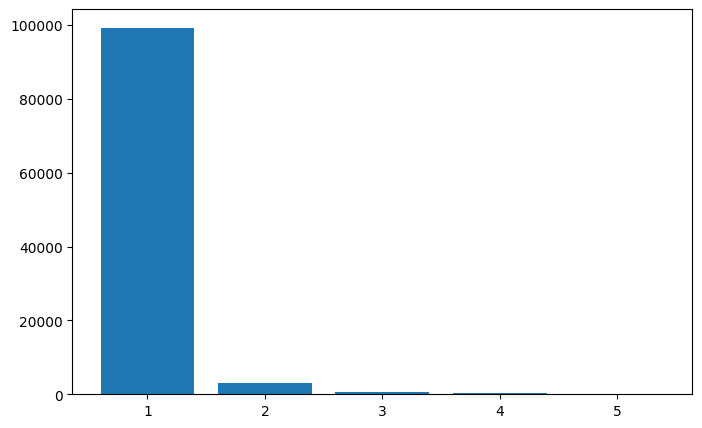

In [52]:
plt.figure(figsize=(8,5))
plt.bar(payment_seq.index, payment_seq.values)
plt.show()

**Payment Type**

In [53]:
payment_type = payments.payment_type.value_counts()
payment_type

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

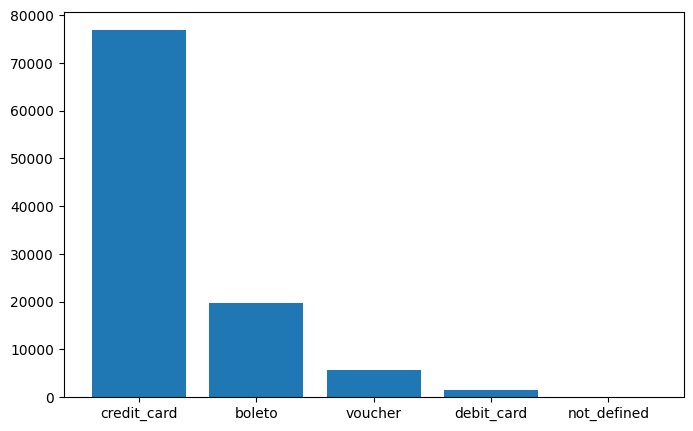

In [54]:
plt.figure(figsize=(8,5))
plt.bar(payment_type.index, payment_type.values)
plt.show()

**Payment Installement**

In [55]:
payment_install = payments['payment_installments'].value_counts().sort_index(ascending=True).head(5)
payment_install

payment_installments
0        2
1    52546
2    12413
3    10461
4     7098
Name: count, dtype: int64

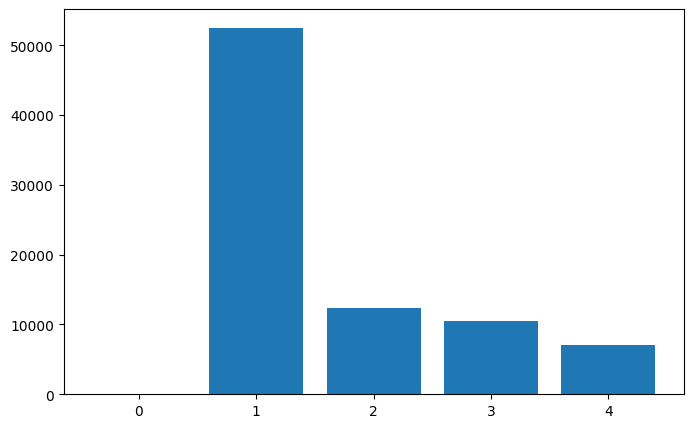

In [56]:
plt.figure(figsize=(8,5))
plt.bar(payment_install.index, payment_install.values)
plt.show()

**Outlier**|

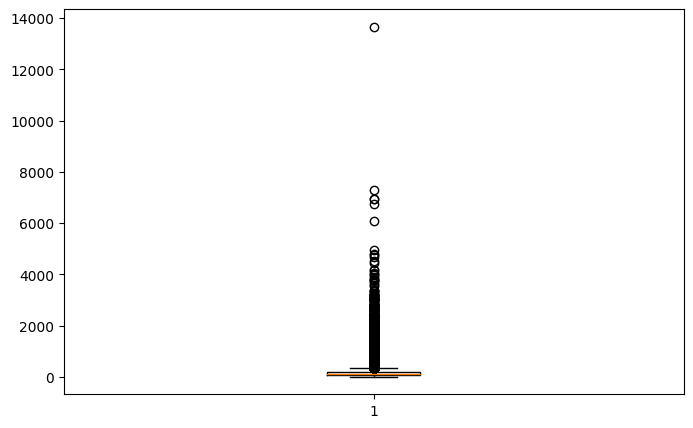

In [57]:
plt.figure(figsize=(8,5))
plt.boxplot(payments['payment_value'])
plt.show()

**Distribution of Payment Value**

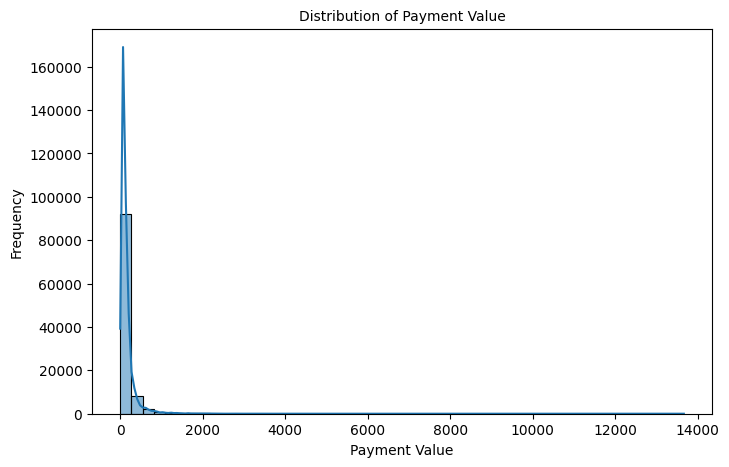

In [58]:
plt.figure(figsize=(8, 5))
sns.histplot(payments['payment_value'], kde=True, bins=50)
plt.title('Distribution of Payment Value', fontsize=10)
plt.xlabel('Payment Value')
plt.ylabel('Frequency')
plt.show()

#### **2.1.7 Reviews Table**

**Conclusion**:
- The average product rating is **5.0**.  
- Out of a total of **99,441 orders**, only **98,673 orders** have been reviewed.  
- **Rating 5.0** is the most frequently given rating, while **rating 1** occurs more often than ratings 2 and 3, and is almost equal to rating 4.  

In [59]:
reviews.describe()

review_score
count  100000.000000
mean        4.070890
std         1.359663
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000

In [60]:
reviews_count = reviews['review_score'].value_counts().sort_index()
reviews_count

review_score
1    11858
2     3235
3     8287
4    19200
5    57420
Name: count, dtype: int64

**Rating**

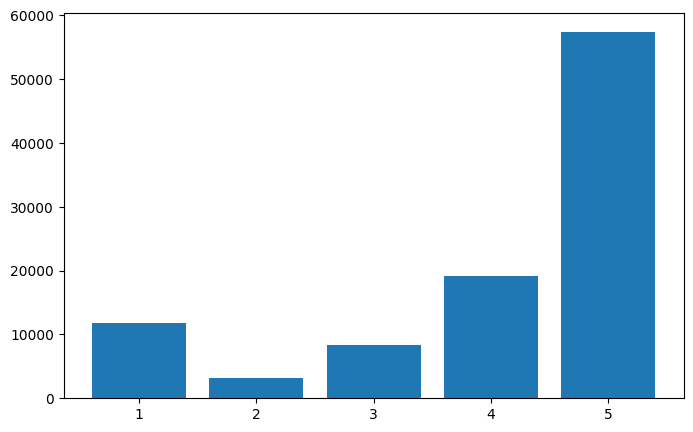

In [61]:
plt.figure(figsize=(8,5))
plt.bar(reviews_count.index, reviews_count.values)
plt.show()

**Reviews Score**

In [62]:
orders[orders['order_status']=='delivered'].shape

(96478, 8)

In [63]:
order_sum = orders['order_id'].nunique()
review_sum = reviews['order_id'].nunique()
print(f"Total Orders: {order_sum}, Total Reviews: {review_sum}")
print(f"Didnt review: {order_sum - review_sum}")

Total Orders: 99441, Total Reviews: 99441
Didnt review: 0


**Comment Review**

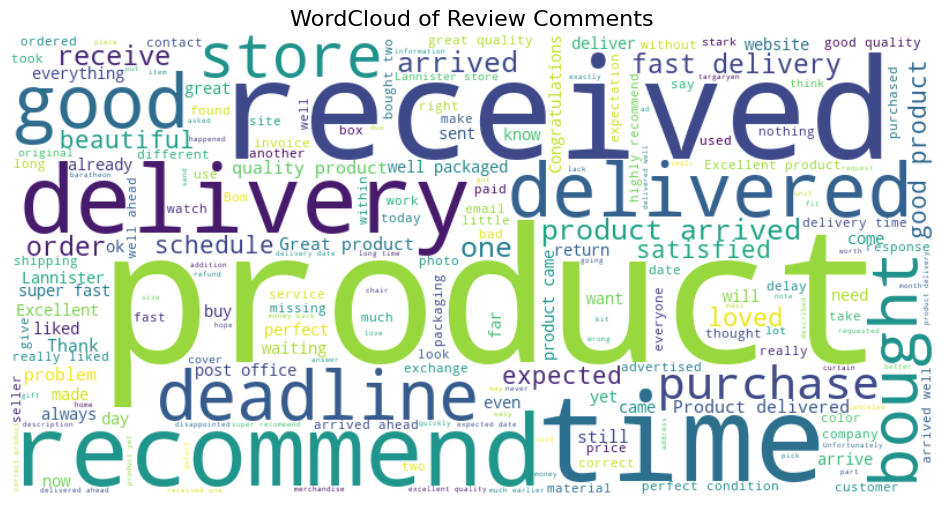

In [64]:
from wordcloud import WordCloud

text = " ".join(str(review) for review in reviews['review_comment_message'].dropna())

# Buat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud of Review Comments", fontsize=16)
plt.show()

#### **2.1.8 Geolocation Table**

In [65]:
geolocation.head()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP

In [66]:
geolocation['geolocation_city'].nunique()

8011

**Geolocation**

In [67]:
geo_count = geolocation['geolocation_city'].value_counts().sort_values(ascending=False).head(10)
geo_count

geolocation_city
sao paulo                135800
rio de janeiro            62151
belo horizonte            27805
são paulo                 24918
curitiba                  16593
porto alegre              13521
salvador                  11865
guarulhos                 11340
brasilia                  10470
sao bernardo do campo      8112
Name: count, dtype: int64

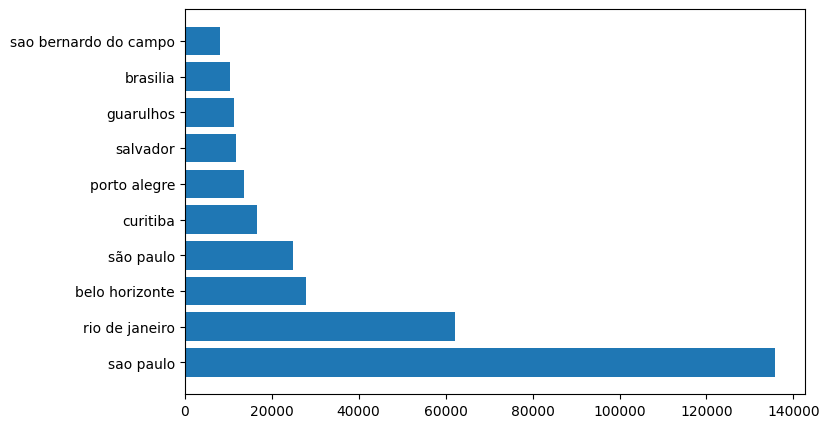

In [68]:
plt.figure(figsize=(8,5))
plt.barh(geo_count.index, geo_count.values)
plt.show()

### **2.2 Thematic EDA Based on Business Aspects**
Perform a deeper analysis based on **three core business aspects**:

- **Customer Analysis:**  
  Explore customer behavior, location distribution, purchasing patterns, and customer reviews.  

- **Seller Analysis:**  
  Examine seller performance, location distribution, shipping efficiency, and contribution to overall sales.  

- **Product Sales Analysis:**  
  Analyze product categories, pricing and shipping cost distribution, and sales trends over time.

#### **2.2.1 Product Sales Analysis**

In [69]:
product_sales = pd.merge(orders, order_items, on='order_id', how='inner')
product_sales

order_id                       customer_id  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2       47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3       949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4       ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                  ...                               ...   
112645  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
112646  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
112647  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
112648  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
112649  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

       order_status order_purchase_timestamp    order_approved_at  \
0         delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1         delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2         delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3         delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4         delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   
...             ...                      ...                  ...   
112645    delivered      2018-02-06 12:58:58  2018-02-06 13:10:37   
112646    delivered      2017-08-27 14:46:43  2017-08-27 15:04:16   
112647    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
112648    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
112649    delivered      2018-03-08 20:57:30  2018-03-09 11:20:28   

       order_delivered_carrier_date order_delivered_customer_date  \
0               2017-10-04 19:55:00           2017-10-10 21:25:13   
1               2018-07-26 14:31:00           2018-08-07 15:27:45   
2               2018-08-08 13:50:00           2018-08-17 18:06:29   
3               2017-11-22 13:39:59           2017-12-02 00:28:42   
4               2018-02-14 19:46:34           2018-02-16 18:17:02   
...                             ...                           ...   
112645          2018-02-07 23:22:42           2018-02-28 17:37:56   
112646          2017-08-28 20:52:26           2017-09-21 11:24:17   
112647          2018-01-12 15:35:03           2018-01-25 23:32:54   
112648          2018-01-12 15:35:03           2018-01-25 23:32:54   
112649          2018-03-09 22:11:59           2018-03-16 13:08:30   

       order_estimated_delivery_date  order_item_id  \
0                2017-10-18 00:00:00              1   
1                2018-08-13 00:00:00              1   
2                2018-09-04 00:00:00              1   
3                2017-12-15 00:00:00              1   
4                2018-02-26 00:00:00              1   
...                              ...            ...   
112645           2018-03-02 00:00:00              1   
112646           2017-09-27 00:00:00              1   
112647           2018-02-15 00:00:00              1   
112648           2018-02-15 00:00:00              2   
112649           2018-04-03 00:00:00              1   

                              product_id                         seller_id  \
0       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
1       595fac2a385ac33a80bd5114aec74eb8  289cdb325fb7e7f891c38608bf9e0962   
2       aa4383b373c6aca5d8797843e5594415  4869f7a5dfa277a7dca6462dcf3b52b2   
3       d0b61bfb1de832b15ba9d266ca96e5b0  66922902710d126a0e7d26b0e3805106   
4       65266b2da20d04dbe00c5c2d3bb7859e  2c9e548be18521d1c43cde1c582c6de8   
...                                  ...                               ...   
112645  f1d4ce8c6dd66c47bbaa8c6781c2a923  1f9ab4708f3056ede07124aad39a2554   
112646  b80910977a37536adeddd63663f916ad  d50d79cb34e38265a8649c383dcffd48   
112647  d1c427060a0f73f6b889a5c7c61f2ac4  a1043bafd471dff536d0c462352beb48

In [70]:
product_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   customer_id                    112650 non-null  object 
 2   order_status                   112650 non-null  object 
 3   order_purchase_timestamp       112650 non-null  object 
 4   order_approved_at              112635 non-null  object 
 5   order_delivered_carrier_date   111456 non-null  object 
 6   order_delivered_customer_date  110196 non-null  object 
 7   order_estimated_delivery_date  112650 non-null  object 
 8   order_item_id                  112650 non-null  int64  
 9   product_id                     112650 non-null  object 
 10  seller_id                      112650 non-null  object 
 11  shipping_limit_date            112650 non-null  object 
 12  price                         

In [71]:
product_sales = pd.merge(product_sales, products, on='product_id', how='inner')
product_sales

order_id                       customer_id  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       128e10d95713541c87cd1a2e48201934  a20e8105f23924cd00833fd87daa0831   
2       0e7e841ddf8f8f2de2bad69267ecfbcf  26c7ac168e1433912a51b924fbd34d34   
3       bfc39df4f36c3693ff3b63fcbea9e90a  53904ddbea91e1e92b2b3f1d09a7af86   
4       53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
...                                  ...                               ...   
112645  e8fd20068b9f7e6ec07068bb7537f781  609b9fb8cad4fe0c7b376f77c8ab76ad   
112646  e8fd20068b9f7e6ec07068bb7537f781  609b9fb8cad4fe0c7b376f77c8ab76ad   
112647  cfa78b997e329a5295b4ee6972c02979  a2f7428f0cafbc8e59f20e1444b67315   
112648  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
112649  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

       order_status order_purchase_timestamp    order_approved_at  \
0         delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1         delivered      2017-08-15 18:29:31  2017-08-15 20:05:16   
2         delivered      2017-08-02 18:24:47  2017-08-02 18:43:15   
3         delivered      2017-10-23 23:26:46  2017-10-25 02:14:11   
4         delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
...             ...                      ...                  ...   
112645    delivered      2017-08-10 21:21:07  2017-08-10 21:35:26   
112646    delivered      2017-08-10 21:21:07  2017-08-10 21:35:26   
112647    delivered      2017-12-20 09:52:41  2017-12-20 10:09:52   
112648    delivered      2017-03-09 09:54:05  2017-03-09 09:54:05   
112649    delivered      2018-03-08 20:57:30  2018-03-09 11:20:28   

       order_delivered_carrier_date order_delivered_customer_date  \
0               2017-10-04 19:55:00           2017-10-10 21:25:13   
1               2017-08-17 15:28:33           2017-08-18 14:44:43   
2               2017-08-04 17:35:43           2017-08-07 18:30:01   
3               2017-10-27 16:48:46           2017-11-07 18:04:59   
4               2018-07-26 14:31:00           2018-08-07 15:27:45   
...                             ...                           ...   
112645          2017-08-18 16:42:51           2017-08-23 15:36:29   
112646          2017-08-18 16:42:51           2017-08-23 15:36:29   
112647          2017-12-20 20:25:25           2018-01-26 15:45:14   
112648          2017-03-10 11:18:03           2017-03-17 15:08:01   
112649          2018-03-09 22:11:59           2018-03-16 13:08:30   

       order_estimated_delivery_date  order_item_id  \
0                2017-10-18 00:00:00              1   
1                2017-08-28 00:00:00              1   
2                2017-08-15 00:00:00              1   
3                2017-11-13 00:00:00              1   
4                2018-08-13 00:00:00              1   
...                              ...            ...   
112645           2017-08-31 00:00:00              1   
112646           2017-08-31 00:00:00              2   
112647           2018-01-18 00:00:00              1   
112648           2017-03-28 00:00:00              1   
112649           2018-04-03 00:00:00              1   

                              product_id  ...   price freight_value  \
0       87285b34884572647811a353c7ac498a  ...   29.99          8.72   
1       87285b34884572647811a353c7ac498a  ...   29.99          7.78   
2       87285b34884572647811a353c7ac498a  ...   29.99          7.78   
3       87285b34884572647811a353c7ac498a  ...   29.99         14.10   
4       595fac2a385ac33a80bd5114aec74eb8  ...  118.70         22.76   
...                                  ...  ...     ...           ...   
112645  0df37da38a30a713453b03053d60d3f7  ...  356.00         18.12   
112646  0df37da38a30a713453b03053d60d3f7  ...  356.00         18.12   
112647  3d2c44374ee42b3003a470f3e937a2ea  ...   55.90         15.14   
112648  ac35486adb7b02598c182c2ff2e05254  ...   72.00         13.0

In [72]:
product_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   customer_id                    112650 non-null  object 
 2   order_status                   112650 non-null  object 
 3   order_purchase_timestamp       112650 non-null  object 
 4   order_approved_at              112635 non-null  object 
 5   order_delivered_carrier_date   111456 non-null  object 
 6   order_delivered_customer_date  110196 non-null  object 
 7   order_estimated_delivery_date  112650 non-null  object 
 8   order_item_id                  112650 non-null  int64  
 9   product_id                     112650 non-null  object 
 10  seller_id                      112650 non-null  object 
 11  shipping_limit_date            112650 non-null  object 
 12  price                         

In [73]:
product_sales = pd.merge(product_sales, customers, on='customer_id', how='inner')
product_sales = pd.merge(product_sales, payments, on='order_id', how='inner')
product_sales = pd.merge(product_sales, reviews, on='order_id', how='inner')
product_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118315 entries, 0 to 118314
Data columns (total 36 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       118315 non-null  object 
 1   customer_id                    118315 non-null  object 
 2   order_status                   118315 non-null  object 
 3   order_purchase_timestamp       118315 non-null  object 
 4   order_approved_at              118300 non-null  object 
 5   order_delivered_carrier_date   117061 non-null  object 
 6   order_delivered_customer_date  115727 non-null  object 
 7   order_estimated_delivery_date  118315 non-null  object 
 8   order_item_id                  118315 non-null  int64  
 9   product_id                     118315 non-null  object 
 10  seller_id                      118315 non-null  object 
 11  shipping_limit_date            118315 non-null  object 
 12  price                         

In [74]:
pd.options.display.max_columns = None

In [75]:
geolocation.head()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP

In [76]:
product_sales.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  128e10d95713541c87cd1a2e48201934  a20e8105f23924cd00833fd87daa0831   
4  0e7e841ddf8f8f2de2bad69267ecfbcf  26c7ac168e1433912a51b924fbd34d34   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
3    delivered      2017-08-15 18:29:31  2017-08-15 20:05:16   
4    delivered      2017-08-02 18:24:47  2017-08-02 18:43:15   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00           2017-10-10 21:25:13   
2          2017-10-04 19:55:00           2017-10-10 21:25:13   
3          2017-08-17 15:28:33           2017-08-18 14:44:43   
4          2017-08-04 17:35:43           2017-08-07 18:30:01   

  order_estimated_delivery_date  order_item_id  \
0           2017-10-18 00:00:00              1   
1           2017-10-18 00:00:00              1   
2           2017-10-18 00:00:00              1   
3           2017-08-28 00:00:00              1   
4           2017-08-15 00:00:00              1   

                         product_id                         seller_id  \
0  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
1  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
2  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
3  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
4  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   

   shipping_limit_date  price  freight_value  product_category_name  \
0  2017-10-06 11:07:15  29.99           8.72  utilidades_domesticas   
1  2017-10-06 11:07:15  29.99           8.72  utilidades_domesticas   
2  2017-10-06 11:07:15  29.99           8.72  utilidades_domesticas   
3  2017-08-21 20:05:16  29.99           7.78  utilidades_domesticas   
4  2017-08-08 18:37:31  29.99           7.78  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       268.0                 4.0   
1                 40.0                       268.0                 4.0   
2                 40.0                       268.0                 4.0   
3                 40.0                       268.0                 4.0   
4                 40.0                       268.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0             500.0               19.0                8.0              13.0   
1             500.0               19.0                8.0              13.0   
2             500.0               19.0                8.0              13.0   
3             500.0               19.0                8.0              13.0   
4             500.0               19.0                8.0              13.0   

                 customer_unique_id  customer_zip_code_prefix customer_city  \
0  7c396fd4830fd04220f754e42b4e5bff                      3149     sao paulo   
1  7c396fd4830fd04220f754e42b4e5bff                      3149     sao paulo   
2  7c396fd4830fd04220f754e42b4e5bff                      3149     sao paulo   
3  3a51803cc0d012c3b5dc8b7528cb05f7                      3366     sao paulo   
4  ef0996a1a279c26e7ecbd737be23d235                      2290     sao paulo   

  customer_state  payment_sequential payment_type  payment_installments  \
0             SP                   1  credit_card                     1   
1             SP                   3      voucher                     1   
2             SP               

In [77]:
product_sales.isnull().sum().sort_values(ascending=False)

review_comment_title             104230
review_comment_message            67682
order_delivered_customer_date      2588
product_category_name              1709
product_photos_qty                 1709
product_description_lenght         1709
product_name_lenght                1709
order_delivered_carrier_date       1254
product_weight_g                     20
product_width_cm                     20
product_height_cm                    20
product_length_cm                    20
order_approved_at                    15
customer_state                        0
payment_installments                  0
payment_sequential                    0
payment_type                          0
customer_zip_code_prefix              0
payment_value                         0
review_id                             0
review_score                          0
review_creation_date                  0
customer_city                         0
order_id                              0
customer_unique_id                    0


In [78]:
category_col = product_sales.select_dtypes(include=['object']).columns

In [79]:
category_col

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'product_id', 'seller_id', 'shipping_limit_date',
       'product_category_name', 'customer_unique_id', 'customer_city',
       'customer_state', 'payment_type', 'review_id', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')

In [80]:
for i in category_col:
    print(f"\nUnique values in column '{i}':")
    print(product_sales[i].unique())



Unique values in column 'order_id':
['e481f51cbdc54678b7cc49136f2d6af7' '128e10d95713541c87cd1a2e48201934'
 '0e7e841ddf8f8f2de2bad69267ecfbcf' ... 'cfa78b997e329a5295b4ee6972c02979'
 '9c5dedf39a927c1b2549525ed64a053c' '66dea50a8b16d9b4dee7af250b4be1a5']

Unique values in column 'customer_id':
['9ef432eb6251297304e76186b10a928d' 'a20e8105f23924cd00833fd87daa0831'
 '26c7ac168e1433912a51b924fbd34d34' ... 'a2f7428f0cafbc8e59f20e1444b67315'
 '39bd1228ee8140590ac3aca26f2dfe00' 'edb027a75a1449115f6b43211ae02a24']

Unique values in column 'order_status':
['delivered' 'shipped' 'invoiced' 'canceled' 'processing' 'unavailable'
 'approved']

Unique values in column 'order_purchase_timestamp':
['2017-10-02 10:56:33' '2017-08-15 18:29:31' '2017-08-02 18:24:47' ...
 '2017-12-20 09:52:41' '2017-03-09 09:54:05' '2018-03-08 20:57:30']

Unique values in column 'order_approved_at':
['2017-10-02 11:07:15' '2017-08-15 20:05:16' '2017-08-02 18:43:15' ...
 '2017-08-10 21:35:26' '2017-03-09 09:54:05' '2018-0

**Monthly Sales**

In [81]:
product_sales['order_purchase_timestamp'] = pd.to_datetime(product_sales['order_purchase_timestamp'])

product_sales['order_purchase_year'] = product_sales['order_purchase_timestamp'].dt.year
product_sales['order_purchase_month'] = product_sales['order_purchase_timestamp'].dt.month
product_sales['order_purchase_day'] = product_sales['order_purchase_timestamp'].dt.day

product_delivered = product_sales[product_sales['order_status'] == 'delivered']

order_per_years = (
    product_delivered
    .groupby([pd.Grouper(key='order_purchase_timestamp', freq='M')])['order_id']
    .count()
    .reset_index()
)

order_per_years

order_purchase_timestamp  order_id
0                2016-10-31       335
1                2016-11-30         0
2                2016-12-31         1
3                2017-01-31       981
4                2017-02-28      1973
5                2017-03-31      3098
6                2017-04-30      2715
7                2017-05-31      4308
8                2017-06-30      3727
9                2017-07-31      4771
10               2017-08-31      5107
11               2017-09-30      5041
12               2017-10-31      5497
13               2017-11-30      8891
14               2017-12-31      6471
15               2018-01-31      8418
16               2018-02-28      7867
17               2018-03-31      8384
18               2018-04-30      8124
19               2018-05-31      8113
20               2018-06-30      7327
21               2018-07-31      7223
22               2018-08-31      7356

In [82]:
product_sales

order_id                       customer_id  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3       128e10d95713541c87cd1a2e48201934  a20e8105f23924cd00833fd87daa0831   
4       0e7e841ddf8f8f2de2bad69267ecfbcf  26c7ac168e1433912a51b924fbd34d34   
...                                  ...                               ...   
118310  e8fd20068b9f7e6ec07068bb7537f781  609b9fb8cad4fe0c7b376f77c8ab76ad   
118311  e8fd20068b9f7e6ec07068bb7537f781  609b9fb8cad4fe0c7b376f77c8ab76ad   
118312  cfa78b997e329a5295b4ee6972c02979  a2f7428f0cafbc8e59f20e1444b67315   
118313  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
118314  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

       order_status order_purchase_timestamp    order_approved_at  \
0         delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1         delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
2         delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
3         delivered      2017-08-15 18:29:31  2017-08-15 20:05:16   
4         delivered      2017-08-02 18:24:47  2017-08-02 18:43:15   
...             ...                      ...                  ...   
118310    delivered      2017-08-10 21:21:07  2017-08-10 21:35:26   
118311    delivered      2017-08-10 21:21:07  2017-08-10 21:35:26   
118312    delivered      2017-12-20 09:52:41  2017-12-20 10:09:52   
118313    delivered      2017-03-09 09:54:05  2017-03-09 09:54:05   
118314    delivered      2018-03-08 20:57:30  2018-03-09 11:20:28   

       order_delivered_carrier_date order_delivered_customer_date  \
0               2017-10-04 19:55:00           2017-10-10 21:25:13   
1               2017-10-04 19:55:00           2017-10-10 21:25:13   
2               2017-10-04 19:55:00           2017-10-10 21:25:13   
3               2017-08-17 15:28:33           2017-08-18 14:44:43   
4               2017-08-04 17:35:43           2017-08-07 18:30:01   
...                             ...                           ...   
118310          2017-08-18 16:42:51           2017-08-23 15:36:29   
118311          2017-08-18 16:42:51           2017-08-23 15:36:29   
118312          2017-12-20 20:25:25           2018-01-26 15:45:14   
118313          2017-03-10 11:18:03           2017-03-17 15:08:01   
118314          2018-03-09 22:11:59           2018-03-16 13:08:30   

       order_estimated_delivery_date  order_item_id  \
0                2017-10-18 00:00:00              1   
1                2017-10-18 00:00:00              1   
2                2017-10-18 00:00:00              1   
3                2017-08-28 00:00:00              1   
4                2017-08-15 00:00:00              1   
...                              ...            ...   
118310           2017-08-31 00:00:00              1   
118311           2017-08-31 00:00:00              2   
118312           2018-01-18 00:00:00              1   
118313           2017-03-28 00:00:00              1   
118314           2018-04-03 00:00:00              1   

                              product_id                         seller_id  \
0       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
1       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
2       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
3       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
4       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
...                                  ...                               ...   
118310  0df37da38a30a713453b03053d60d3f7  218d46b86c1881d022bce9c68a7d4b15   
118311  0df37da38a30a713453b03053d60d3f7  218d46b86c1881d022bce9c68a7d4b15   
118312  3d2c44374ee42b3003a470f3e937a2ea  ce248b21cb2adc36282ede306b7660e5

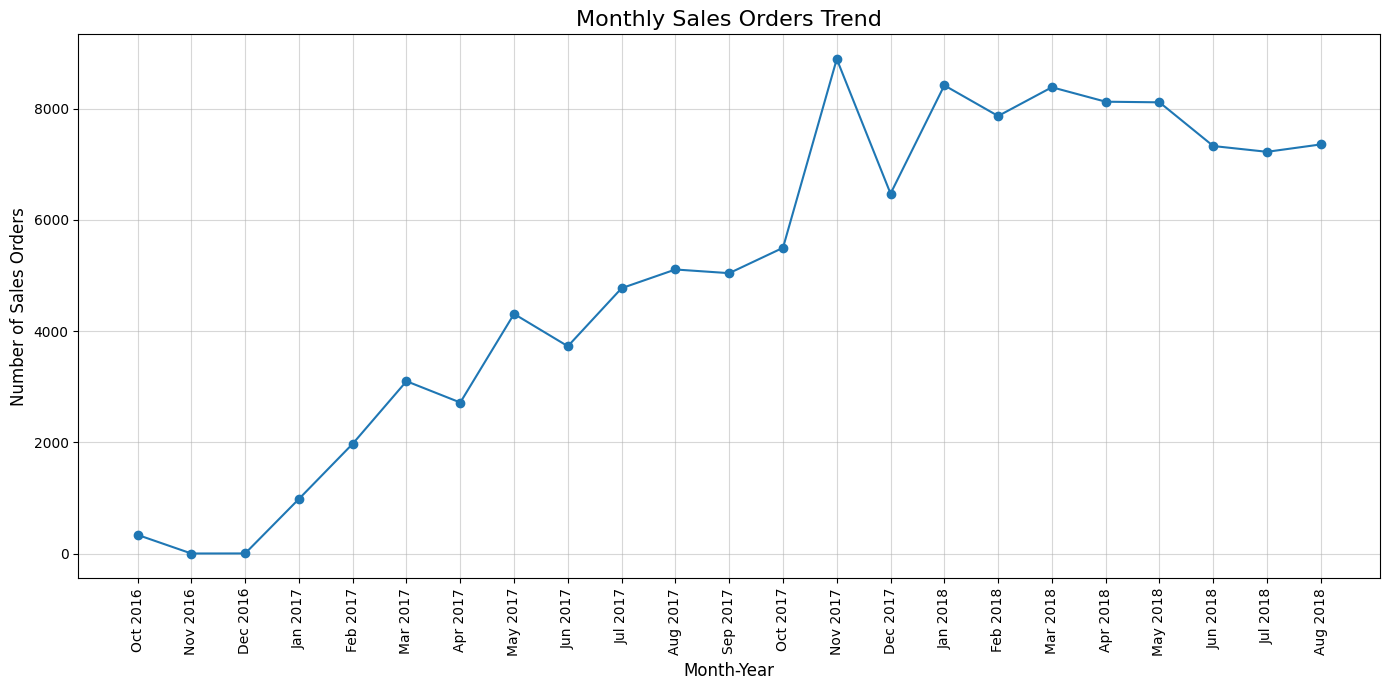

In [83]:
order_per_years['month_year'] = order_per_years['order_purchase_timestamp'].dt.strftime('%b %Y')

plt.figure(figsize=(14, 7))
plt.plot(order_per_years['month_year'], order_per_years['order_id'], marker='o')
plt.title("Monthly Sales Orders Trend", fontsize=16)
plt.xlabel("Month-Year", fontsize=12)
plt.ylabel("Number of Sales Orders", fontsize=12)
plt.xticks(rotation=90)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

**Day With Order**

In [84]:
product_sales['order_approved_at'] = pd.to_datetime(product_sales['order_approved_at'])

product_sales['order_approved_day_name'] = product_sales['order_approved_at'].dt.day_name()
product_sales['order_approved_year_name'] = product_sales['order_approved_at'].dt.year

filtered_df = product_sales[product_sales['order_status'].isin(['invoiced', 'delivered'])]


order_by_day = (
    filtered_df.groupby(['order_approved_year_name', 'order_approved_day_name'])['order_id']
    .count()
    .reset_index()
)

top3_days_per_year = order_by_day.groupby('order_approved_year_name').apply(lambda x: x.nlargest(3, 'order_id')).reset_index(drop=True)

top3_days_per_year

order_approved_year_name order_approved_day_name  order_id
0                    2016.0                Thursday       121
1                    2016.0                  Friday        64
2                    2016.0                  Monday        60
3                    2017.0                 Tuesday      9761
4                    2017.0               Wednesday      8458
5                    2017.0                  Friday      8092
6                    2018.0                 Tuesday     12513
7                    2018.0                Thursday     10306
8                    2018.0               Wednesday      9969

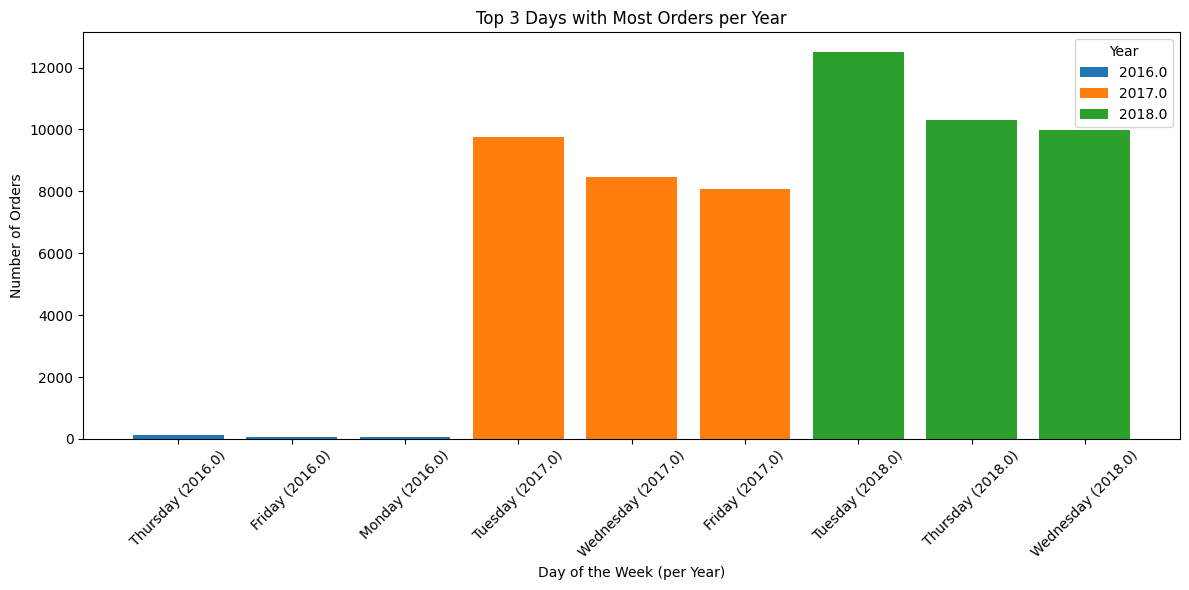

In [85]:
plt.figure(figsize=(12,6))

# Bikin grouped bar chart
for year in top3_days_per_year['order_approved_year_name'].unique():
    data = top3_days_per_year[top3_days_per_year['order_approved_year_name'] == year]
    plt.bar(
        data['order_approved_day_name'] + " (" + data['order_approved_year_name'].astype(str) + ")",
        data['order_id'],
        label=str(year)
    )

plt.xticks(rotation=45)
plt.title("Top 3 Days with Most Orders per Year")
plt.xlabel("Day of the Week (per Year)")
plt.ylabel("Number of Orders")
plt.legend(title="Year")
plt.tight_layout()
plt.show()

**Comparison Delivery Status**

In [86]:
product_sales['order_delivered_customer_date'] = pd.to_datetime(product_sales['order_delivered_customer_date'])
product_sales['order_estimated_delivery_date'] = pd.to_datetime(product_sales['order_estimated_delivery_date'])

def check_delay(row):
    if pd.isnull(row['order_delivered_customer_date']) or pd.isnull(row['order_estimated_delivery_date']):
        return 'Missing Data'
    elif row['order_delivered_customer_date'] > row['order_estimated_delivery_date']:
        return 'Late'
    else:
        return 'On Time'
    
product_sales['delivery_status'] = product_sales.apply(check_delay, axis=1)

delay_count = product_sales['delivery_status'].value_counts()
delay_count

delivery_status
On Time         106662
Late              9065
Missing Data      2588
Name: count, dtype: int64

In [87]:
delay_count.drop('Missing Data', inplace=True)
delay_count

delivery_status
On Time    106662
Late         9065
Name: count, dtype: int64

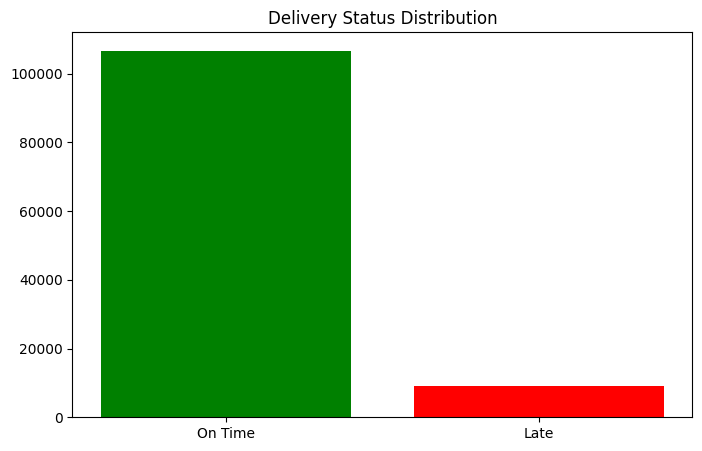

In [88]:
plt.figure(figsize=(8,5))
plt.bar(delay_count.index, delay_count.values, color=['green', 'red'])
plt.title("Delivery Status Distribution")
plt.show()

**Delivery Status by Month**

In [89]:
product_sales['month'] = product_sales['order_estimated_delivery_date'].dt.to_period('M')

monthly_status = product_sales.groupby(['month', 'delivery_status'])['order_id'].count().unstack().fillna(0)

monthly_status.index = monthly_status.index.to_timestamp()
monthly_status.index = monthly_status.index.strftime('%b %Y')

In [90]:
monthly_status

delivery_status    Late  Missing Data  On Time
month                                         
Oct 2016            0.0           4.0      1.0
Nov 2016            2.0          18.0    184.0
Dec 2016            1.0          26.0    151.0
Jan 2017            0.0           0.0      3.0
Feb 2017           13.0           9.0    347.0
Mar 2017          108.0         149.0   3116.0
Apr 2017          136.0          90.0   2441.0
May 2017          264.0         162.0   3210.0
Jun 2017          135.0         132.0   4092.0
Jul 2017          155.0         102.0   3671.0
Aug 2017          160.0         119.0   5032.0
Sep 2017          191.0         121.0   5004.0
Oct 2017          258.0         100.0   4583.0
Nov 2017          295.0         127.0   5295.0
Dec 2017         1209.0         195.0   7387.0
Jan 2018          483.0         110.0   5944.0
Feb 2018          489.0         163.0   6772.0
Mar 2018         1875.0         207.0   8361.0
Apr 2018         1201.0         198.0   6641.0
May 2018          449.0         168.0   8988.0
Jun 2018          493.0          79.0   5066.0
Jul 2018          149.0          98.0   8324.0
Aug 2018          999.0         207.0   9699.0
Sep 2018            0.0           4.0   2278.0
Oct 2018            0.0           0.0     72.0

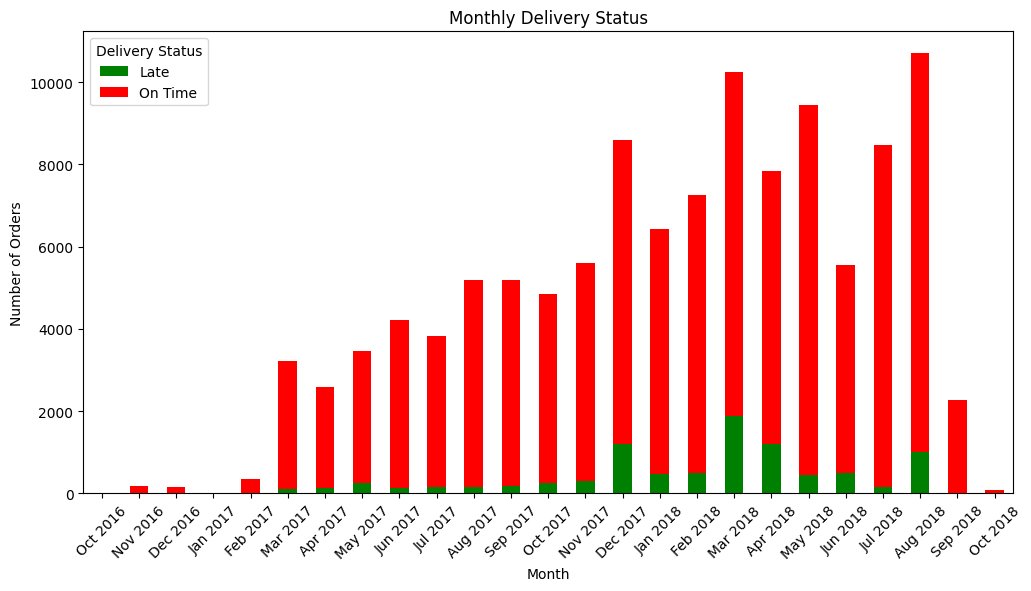

In [91]:
if 'Missing Data' in monthly_status.columns:
    monthly_status.drop(columns='Missing Data', inplace=True)

plt.figure(figsize=(12, 6))
monthly_status.plot(kind='bar', stacked=True, color=['green', 'red'], ax=plt.gca())
plt.title("Monthly Delivery Status")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.legend(title="Delivery Status")
plt.show()

In [92]:
product_sales['delay_days'] = (
    product_sales['order_delivered_customer_date'] - product_sales['order_estimated_delivery_date']\
).dt.days


product_sales

order_id                       customer_id  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3       128e10d95713541c87cd1a2e48201934  a20e8105f23924cd00833fd87daa0831   
4       0e7e841ddf8f8f2de2bad69267ecfbcf  26c7ac168e1433912a51b924fbd34d34   
...                                  ...                               ...   
118310  e8fd20068b9f7e6ec07068bb7537f781  609b9fb8cad4fe0c7b376f77c8ab76ad   
118311  e8fd20068b9f7e6ec07068bb7537f781  609b9fb8cad4fe0c7b376f77c8ab76ad   
118312  cfa78b997e329a5295b4ee6972c02979  a2f7428f0cafbc8e59f20e1444b67315   
118313  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
118314  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

       order_status order_purchase_timestamp   order_approved_at  \
0         delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1         delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
2         delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
3         delivered      2017-08-15 18:29:31 2017-08-15 20:05:16   
4         delivered      2017-08-02 18:24:47 2017-08-02 18:43:15   
...             ...                      ...                 ...   
118310    delivered      2017-08-10 21:21:07 2017-08-10 21:35:26   
118311    delivered      2017-08-10 21:21:07 2017-08-10 21:35:26   
118312    delivered      2017-12-20 09:52:41 2017-12-20 10:09:52   
118313    delivered      2017-03-09 09:54:05 2017-03-09 09:54:05   
118314    delivered      2018-03-08 20:57:30 2018-03-09 11:20:28   

       order_delivered_carrier_date order_delivered_customer_date  \
0               2017-10-04 19:55:00           2017-10-10 21:25:13   
1               2017-10-04 19:55:00           2017-10-10 21:25:13   
2               2017-10-04 19:55:00           2017-10-10 21:25:13   
3               2017-08-17 15:28:33           2017-08-18 14:44:43   
4               2017-08-04 17:35:43           2017-08-07 18:30:01   
...                             ...                           ...   
118310          2017-08-18 16:42:51           2017-08-23 15:36:29   
118311          2017-08-18 16:42:51           2017-08-23 15:36:29   
118312          2017-12-20 20:25:25           2018-01-26 15:45:14   
118313          2017-03-10 11:18:03           2017-03-17 15:08:01   
118314          2018-03-09 22:11:59           2018-03-16 13:08:30   

       order_estimated_delivery_date  order_item_id  \
0                         2017-10-18              1   
1                         2017-10-18              1   
2                         2017-10-18              1   
3                         2017-08-28              1   
4                         2017-08-15              1   
...                              ...            ...   
118310                    2017-08-31              1   
118311                    2017-08-31              2   
118312                    2018-01-18              1   
118313                    2017-03-28              1   
118314                    2018-04-03              1   

                              product_id                         seller_id  \
0       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
1       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
2       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
3       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
4       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
...                                  ...                               ...   
118310  0df37da38a30a713453b03053d60d3f7  218d46b86c1881d022bce9c68a7d4b15   
118311  0df37da38a30a713453b03053d60d3f7  218d46b86c1881d022bce9c68a7d4b15   
118312  3d2c44374ee42b3003a470f3e937a2ea  ce248b21cb2adc36282ede306b7660e5   
118313  

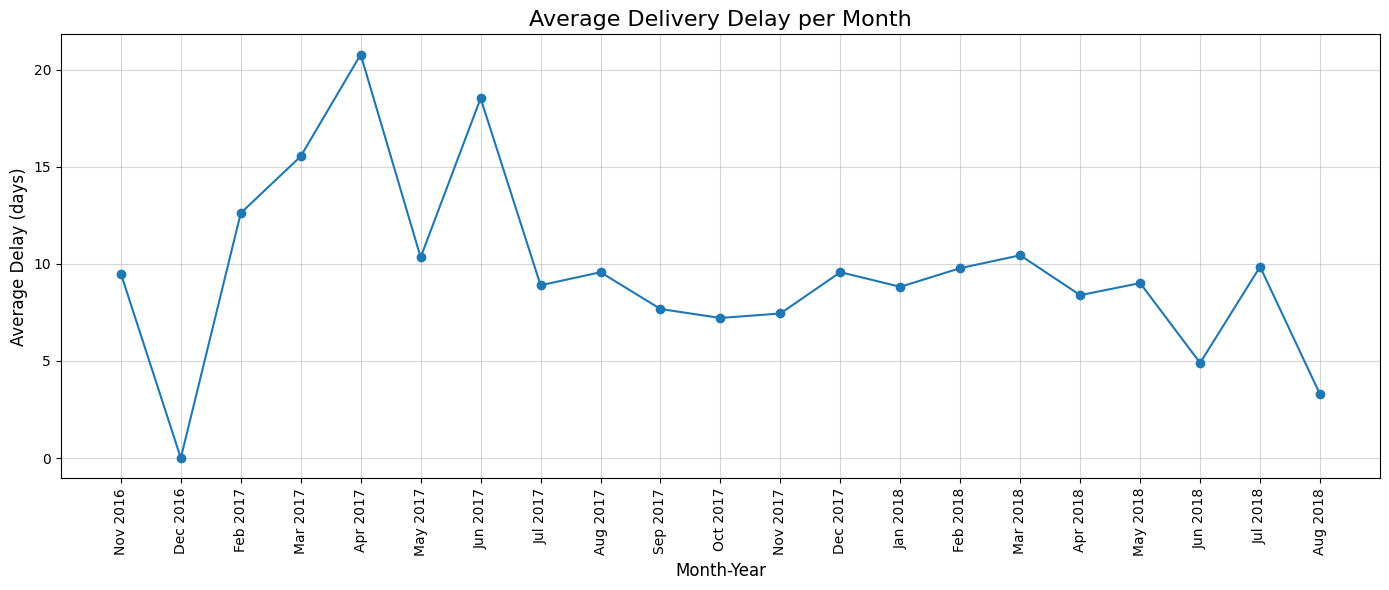

In [93]:
product_sales['month_year'] = product_sales['order_estimated_delivery_date'].dt.to_period('M')

delay_filltered = product_sales[product_sales['delay_days'] >= 0]

monthly_delay = (
    delay_filltered.groupby('month_year')['delay_days']
    .mean()
    .reset_index()
)

monthly_delay['month_year'] = monthly_delay['month_year'].dt.to_timestamp()
monthly_delay['month_year_str'] = monthly_delay['month_year'].dt.strftime('%b %Y')

plt.figure(figsize=(14,6))
plt.plot(monthly_delay['month_year_str'], monthly_delay['delay_days'], marker='o', linestyle='-')
plt.title("Average Delivery Delay per Month", fontsize=16)
plt.xlabel("Month-Year", fontsize=12)
plt.ylabel("Average Delay (days)", fontsize=12)
plt.xticks(rotation=90)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

**Why Delayed??**

In [94]:
delay_filltered.head().sort_values(by='delay_days', ascending=False)

order_id                       customer_id  \
34  fc74153e0ac39bb68c8f8f9e4758f001  787c8dad81798b72c5ae7d0ed526192e   
35  bb535f122a301b2b48f02befcedfcad5  5fa3e7405bd851a51f1e1aa56fc145a0   
15  6552ae78f1de31bcde1fc2cfcab0d25d  ccb212cf6faf1356d9b5509259de0940   
44  f7f0b79050e7ef0b1cf7ffceb0aa114a  46fb8cff647939aaf32c4ab5be554501   
49  591d010258be8e3bc48d82503022a507  c46809cdeaa8e5698a9169c27de52b7b   

   order_status order_purchase_timestamp   order_approved_at  \
34    delivered      2018-04-12 12:40:46 2018-04-13 12:50:48   
35    delivered      2017-08-03 11:36:18 2017-08-04 09:35:18   
15    delivered      2018-05-17 14:05:28 2018-05-18 02:14:44   
44    delivered      2018-08-04 14:40:31 2018-08-07 04:44:36   
49    delivered      2018-05-22 13:04:15 2018-05-22 13:15:18   

   order_delivered_carrier_date order_delivered_customer_date  \
34          2018-04-18 20:51:19           2018-06-29 17:03:25   
35          2017-08-07 14:40:04           2017-09-18 18:24:48   
15          2018-05-23 12:44:00           2018-06-18 20:34:58   
44          2018-08-13 15:19:00           2018-08-14 15:08:57   
49          2018-05-25 12:41:00           2018-06-07 19:52:40   

   order_estimated_delivery_date  order_item_id  \
34                    2018-05-11              1   
35                    2017-08-25              1   
15                    2018-06-07              1   
44                    2018-08-10              1   
49                    2018-06-04              1   

                          product_id                         seller_id  \
34  595fac2a385ac33a80bd5114aec74eb8  ef0ace09169ac090589d85746e3e036f   
35  595fac2a385ac33a80bd5114aec74eb8  058fd0aa2bfdb2274e05e1ae971dabb6   
15  595fac2a385ac33a80bd5114aec74eb8  ef0ace09169ac090589d85746e3e036f   
44  595fac2a385ac33a80bd5114aec74eb8  289cdb325fb7e7f891c38608bf9e0962   
49  595fac2a385ac33a80bd5114aec74eb8  ef0ace09169ac090589d85746e3e036f   

    shipping_limit_date  price  freight_value product_category_name  \
34  2018-04-19 12:50:48  117.7          51.32            perfumaria   
35  2017-08-10 09:31:33  142.5          15.75            perfumaria   
15  2018-05-23 02:14:44  119.9          18.72            perfumaria   
44  2018-08-09 04:44:36  116.9           9.33            perfumaria   
49  2018-05-25 13:15:18  119.9           8.78            perfumaria   

    product_name_lenght  product_description_lenght  product_photos_qty  \
34                 29.0                       178.0                 1.0   
35                 29.0                       178.0                 1.0   
15                 29.0                       178.0                 1.0   
44                 29.0                       178.0                 1.0   
49                 29.0                       178.0                 1.0   

    product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
34             400.0               19.0               13.0              19.0   
35             400.0               19.0               13.0              19.0   
15             400.0               19.0               13.0              19.0   
44             400.0               19.0               13.0              19.0   
49             400.0               19.0               13.0              19.0   

                  customer_unique_id  customer_zip_code_prefix  \
34  40dcf0ca504c92ee3e0e59ee94fb9423                     59970   
35  73fd25c9fc5706f6db9eaecbf248241e                     23811   
15  6a34ee4ea650624a9754fbdc99fdd356                     19026   
44  3edcab192482e9871c17b34cf98c3996                     33821   
49  56130a3a977039ba949d71f501d4669f                     25250   

          customer_city customer_state  payment_sequential payment_type  \
34     marcelino vieira             RN                   1  credit_card   
35              itaguai             RJ                   1  credit_card   
15  presidente prudente             SP                   1  credit_card   

In [95]:
df_corr = product_sales[['product_weight_g','freight_value','product_length_cm','product_height_cm','product_width_cm', 'delivery_status']].dropna()
df_corr = df_corr[df_corr['delivery_status'] != 'Missing Data']
df_corr

product_weight_g  freight_value  product_length_cm  product_height_cm  \
0                  500.0           8.72               19.0                8.0   
1                  500.0           8.72               19.0                8.0   
2                  500.0           8.72               19.0                8.0   
3                  500.0           7.78               19.0                8.0   
4                  500.0           7.78               19.0                8.0   
...                  ...            ...                ...                ...   
118310            2800.0          18.12               28.0               23.0   
118311            2800.0          18.12               28.0               23.0   
118312             300.0          15.14               16.0                6.0   
118313            1175.0          13.08               22.0               13.0   
118314             150.0          18.36               16.0                7.0   

        product_width_cm delivery_status  
0                   13.0         On Time  
1                   13.0         On Time  
2                   13.0         On Time  
3                   13.0         On Time  
4                   13.0         On Time  
...                  ...             ...  
118310              23.0         On Time  
118311              23.0         On Time  
118312              12.0            Late  
118313              18.0         On Time  
118314              15.0         On Time  

[115707 rows x 6 columns]

In [96]:
status_map = {'On Time': 0, 'Late': 1}
df_corr['delivery_status_num'] = df_corr['delivery_status'].map(status_map)
df_corr.drop(columns='delivery_status', inplace=True)
df_corr

product_weight_g  freight_value  product_length_cm  product_height_cm  \
0                  500.0           8.72               19.0                8.0   
1                  500.0           8.72               19.0                8.0   
2                  500.0           8.72               19.0                8.0   
3                  500.0           7.78               19.0                8.0   
4                  500.0           7.78               19.0                8.0   
...                  ...            ...                ...                ...   
118310            2800.0          18.12               28.0               23.0   
118311            2800.0          18.12               28.0               23.0   
118312             300.0          15.14               16.0                6.0   
118313            1175.0          13.08               22.0               13.0   
118314             150.0          18.36               16.0                7.0   

        product_width_cm  delivery_status_num  
0                   13.0                    0  
1                   13.0                    0  
2                   13.0                    0  
3                   13.0                    0  
4                   13.0                    0  
...                  ...                  ...  
118310              23.0                    0  
118311              23.0                    0  
118312              12.0                    1  
118313              18.0                    0  
118314              15.0                    0  

[115707 rows x 6 columns]

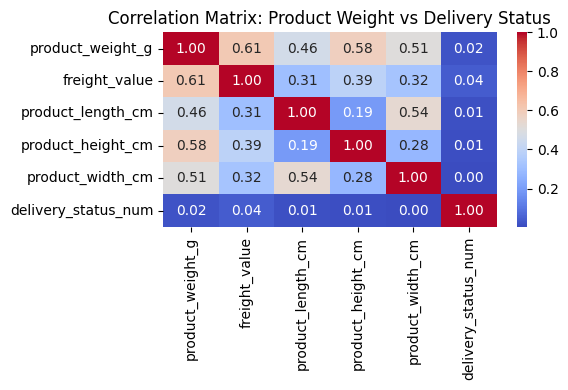

In [97]:
corr_matrix = df_corr.corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix: Product Weight vs Delivery Status")
plt.tight_layout()
plt.show()

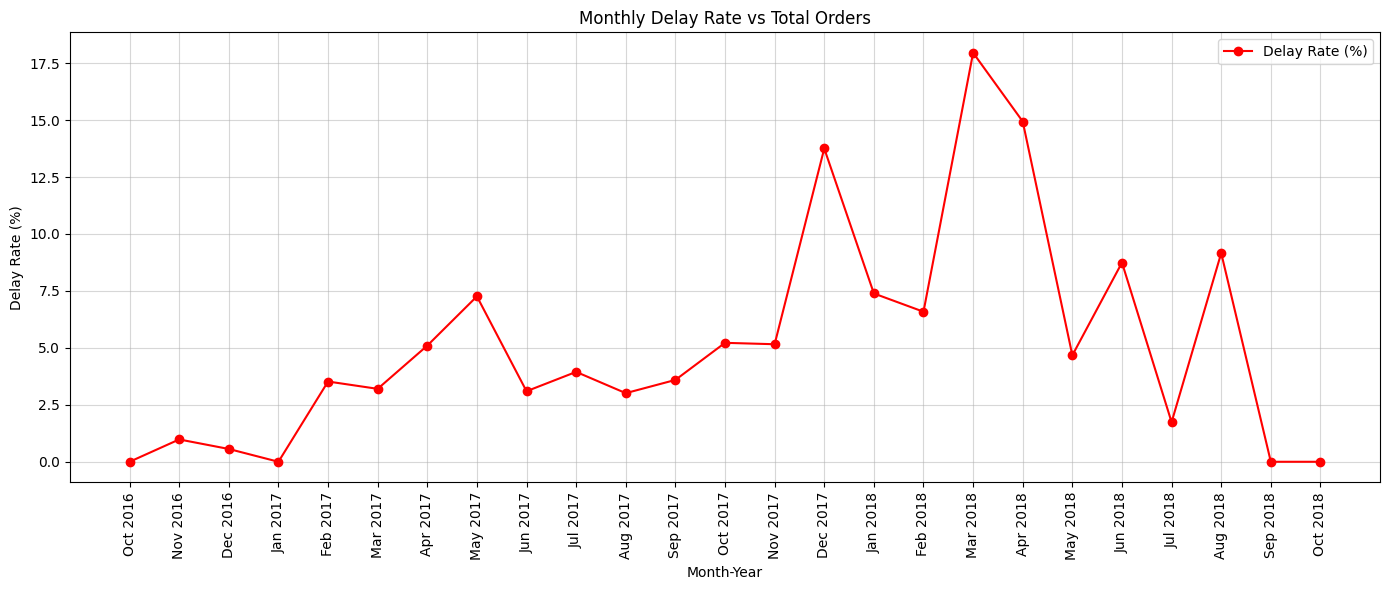

total_orders  delayed_orders  delay_rate_% month_year_str
month                                                                
2016-10-01             5             0.0      0.000000       Oct 2016
2016-11-01           204             2.0      0.980392       Nov 2016
2016-12-01           178             1.0      0.561798       Dec 2016
2017-01-01             3             0.0      0.000000       Jan 2017
2017-02-01           369            13.0      3.523035       Feb 2017

In [98]:
import matplotlib.pyplot as plt

# Buat kolom bulan
product_sales['month'] = product_sales['order_estimated_delivery_date'].dt.to_period('M')

# Hitung jumlah order per bulan
monthly_orders = product_sales.groupby('month')['order_id'].count()
monthly_delayed = product_sales[product_sales['delivery_status'] == 'Late'].groupby('month')['order_id'].count()

# Gabungkan ke satu dataframe
delay_trend = pd.DataFrame({
    'total_orders': monthly_orders,
    'delayed_orders': monthly_delayed
}).fillna(0)

# Hitung persentase
delay_trend['delay_rate_%'] = (delay_trend['delayed_orders'] / delay_trend['total_orders']) * 100

# Ubah index jadi timestamp & buat label string "Nov 2017"
delay_trend.index = delay_trend.index.to_timestamp()
delay_trend['month_year_str'] = delay_trend.index.strftime('%b %Y')

# Plot pakai label string
plt.figure(figsize=(14,6))
plt.plot(delay_trend['month_year_str'], delay_trend['delay_rate_%'], marker='o', color='red', label='Delay Rate (%)')
plt.title("Monthly Delay Rate vs Total Orders")
plt.ylabel("Delay Rate (%)")
plt.xlabel("Month-Year")
plt.xticks(rotation=90)
plt.grid(alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

delay_trend.head()

#### **2.2.2 Customer Analysis**

In [99]:
customers.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

In [100]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [101]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [102]:
geolocation.head()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP

In [103]:
geolocation.drop_duplicates(subset='geolocation_state', inplace=True)

customers_analysis = pd.merge(orders, customers, on='customer_id', how='inner')
customers_analysis = pd.merge(customers_analysis, order_items, on='order_id', how='inner')
customers_analysis = pd.merge(customers_analysis, reviews, on='order_id', how='inner')
customers_analysis = pd.merge(customers_analysis, geolocation, left_on='customer_state',right_on='geolocation_state' ,how='left')
customers_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113322 entries, 0 to 113321
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113322 non-null  object 
 1   customer_id                    113322 non-null  object 
 2   order_status                   113322 non-null  object 
 3   order_purchase_timestamp       113322 non-null  object 
 4   order_approved_at              113307 non-null  object 
 5   order_delivered_carrier_date   112119 non-null  object 
 6   order_delivered_customer_date  110847 non-null  object 
 7   order_estimated_delivery_date  113322 non-null  object 
 8   customer_unique_id             113322 non-null  object 
 9   customer_zip_code_prefix       113322 non-null  int64  
 10  customer_city                  113322 non-null  object 
 11  customer_state                 113322 non-null  object 
 12  order_item_id                 

**Customer Demographic**

In [104]:
customers_analysis['customer_years'] = pd.to_datetime(customers_analysis['order_purchase_timestamp']).dt.year
customers_analysis

order_id                       customer_id  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2       47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3       949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4       ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                  ...                               ...   
113317  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
113318  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
113319  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
113320  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
113321  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

       order_status order_purchase_timestamp    order_approved_at  \
0         delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1         delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2         delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3         delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4         delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   
...             ...                      ...                  ...   
113317    delivered      2018-02-06 12:58:58  2018-02-06 13:10:37   
113318    delivered      2017-08-27 14:46:43  2017-08-27 15:04:16   
113319    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
113320    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
113321    delivered      2018-03-08 20:57:30  2018-03-09 11:20:28   

       order_delivered_carrier_date order_delivered_customer_date  \
0               2017-10-04 19:55:00           2017-10-10 21:25:13   
1               2018-07-26 14:31:00           2018-08-07 15:27:45   
2               2018-08-08 13:50:00           2018-08-17 18:06:29   
3               2017-11-22 13:39:59           2017-12-02 00:28:42   
4               2018-02-14 19:46:34           2018-02-16 18:17:02   
...                             ...                           ...   
113317          2018-02-07 23:22:42           2018-02-28 17:37:56   
113318          2017-08-28 20:52:26           2017-09-21 11:24:17   
113319          2018-01-12 15:35:03           2018-01-25 23:32:54   
113320          2018-01-12 15:35:03           2018-01-25 23:32:54   
113321          2018-03-09 22:11:59           2018-03-16 13:08:30   

       order_estimated_delivery_date                customer_unique_id  \
0                2017-10-18 00:00:00  7c396fd4830fd04220f754e42b4e5bff   
1                2018-08-13 00:00:00  af07308b275d755c9edb36a90c618231   
2                2018-09-04 00:00:00  3a653a41f6f9fc3d2a113cf8398680e8   
3                2017-12-15 00:00:00  7c142cf63193a1473d2e66489a9ae977   
4                2018-02-26 00:00:00  72632f0f9dd73dfee390c9b22eb56dd6   
...                              ...                               ...   
113317           2018-03-02 00:00:00  da62f9e57a76d978d02ab5362c509660   
113318           2017-09-27 00:00:00  737520a9aad80b3fbbdad19b66b37b30   
113319           2018-02-15 00:00:00  5097a5312c8b157bb7be58ae360ef43c   
113320           2018-02-15 00:00:00  5097a5312c8b157bb7be58ae360ef43c   
113321           2018-04-03 00:00:00  60350aa974b26ff12caad89e55993bd6   

        customer_zip_code_prefix            customer_city customer_state  \
0                           3149                sao paulo             SP   
1                          47813                barreiras             BA   
2                          75265               vianopolis             GO   
3                          59296  sao goncalo do amarante             RN   
4                           9195              santo andre             SP   
...                          ...                      ...            ...   
113317          

In [105]:
customers_2k18 = customers_analysis[customers_analysis['customer_years'] == 2018]
customers_2k17 = customers_analysis[customers_analysis['customer_years'] == 2017]

In [106]:
# Top 5 kota 2017
top_2017 = (
    customers_2k17.groupby("geolocation_city")["order_id"]
    .count()
    .reset_index()
    .sort_values("order_id", ascending=False)
    .head(5)
)
top_2017["year"] = 2017

# Top 5 kota 2018
top_2018 = (
    customers_2k18.groupby("geolocation_city")["order_id"]
    .count()
    .reset_index()
    .sort_values("order_id", ascending=False)
    .head(5)
)
top_2018["year"] = 2018

# Gabung jadi satu tabel
top_cities = pd.concat([top_2017, top_2018], ignore_index=True)
print(top_cities)


  geolocation_city  order_id  year
0        sao paulo     20270  2017
1   rio de janeiro      7080  2017
2   belo horizonte      6165  2017
3   nova andradina      3033  2017
4         curitiba      2579  2017
5        sao paulo     27418  2018
6   rio de janeiro      7533  2018
7   belo horizonte      6992  2018
8   nova andradina      3229  2018
9         curitiba      3155  2018


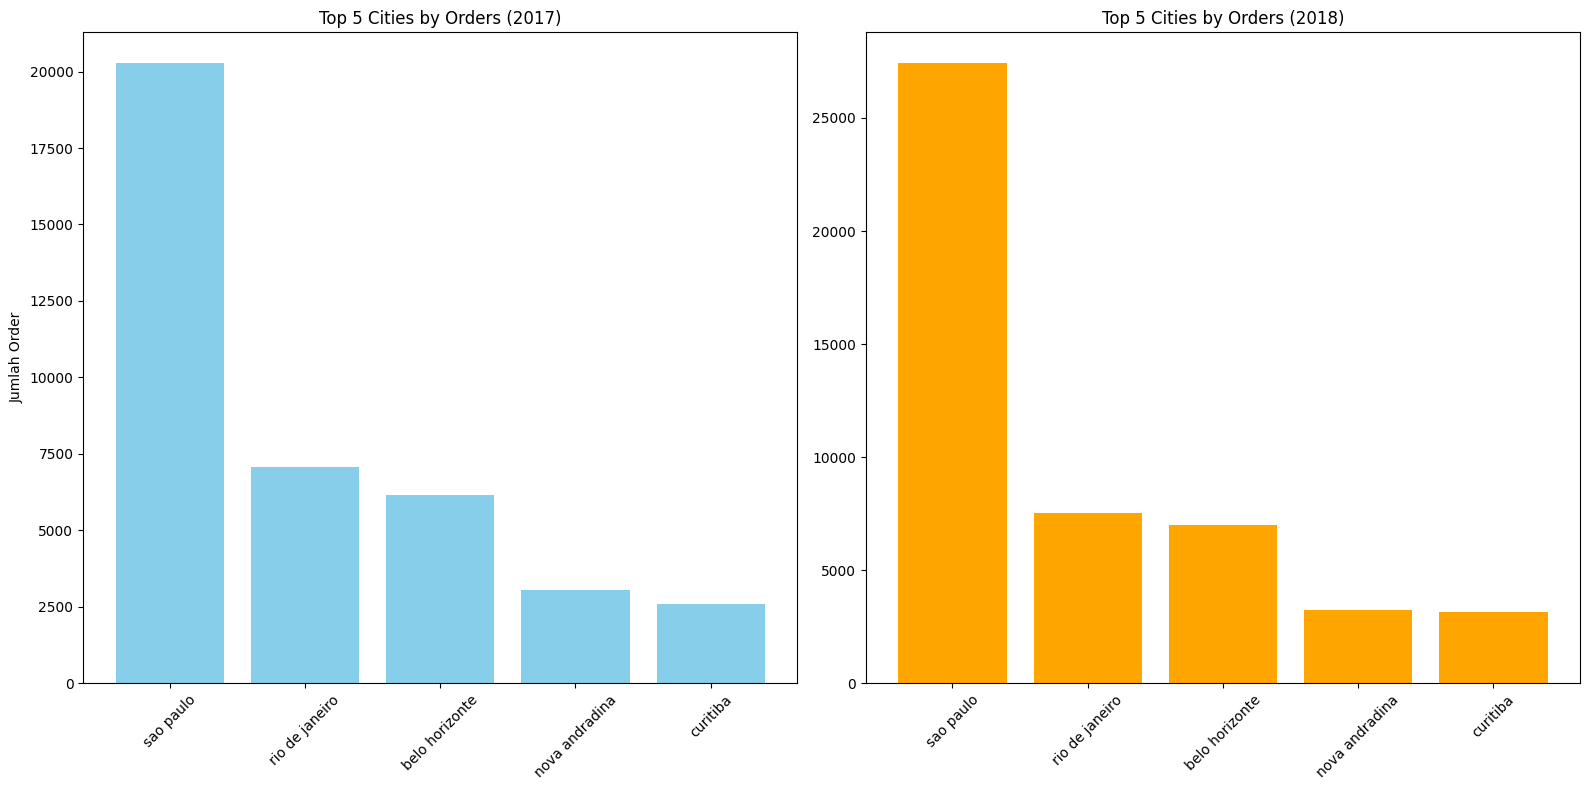

In [107]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))

# Bar chart 2017
axes[0].bar(top_2017["geolocation_city"], top_2017["order_id"], color="skyblue")
axes[0].set_title("Top 5 Cities by Orders (2017)")
axes[0].set_ylabel("Jumlah Order")
axes[0].tick_params(axis='x', rotation=45)

# Bar chart 2018
axes[1].bar(top_2018["geolocation_city"], top_2018["order_id"], color="orange")
axes[1].set_title("Top 5 Cities by Orders (2018)")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

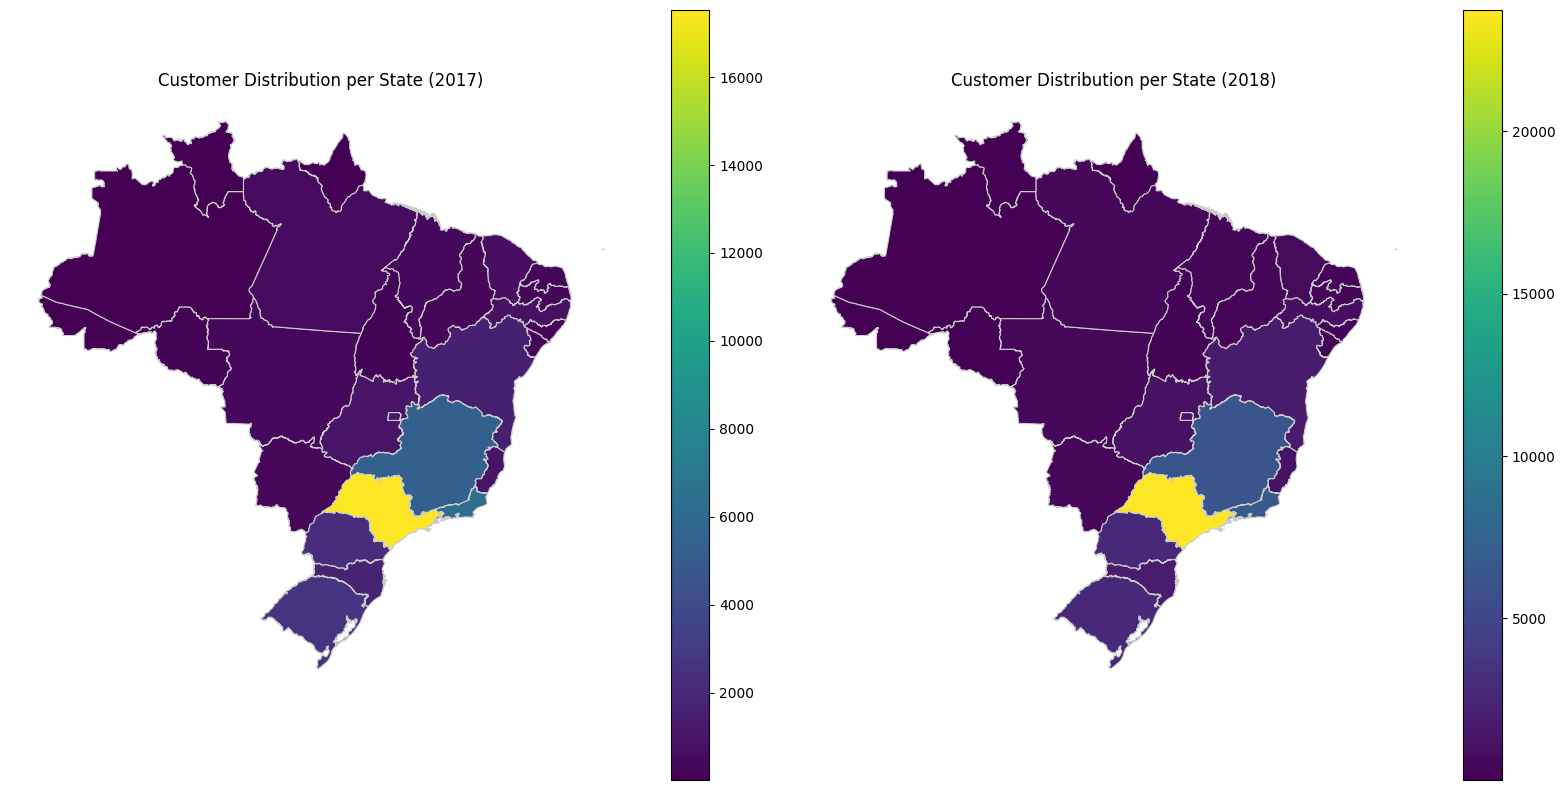

In [108]:
import geopandas as gpd
import matplotlib.pyplot as plt
import requests
import io
import json

url = "https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson"
data = requests.get(url).json()

# Convert dict → str → bytes → BytesIO
gdf = gpd.read_file(io.StringIO(json.dumps(data)))

# --- Data Customer 2017 ---
state_counts_2017 = customers_2k17.groupby("customer_state")["customer_id"].nunique().reset_index()
gdf_2017 = gdf.merge(state_counts_2017, left_on="sigla", right_on="customer_state", how="left")

# --- Data Customer 2018 ---
state_counts_2018 = customers_2k18.groupby("customer_state")["customer_id"].nunique().reset_index()
gdf_2018 = gdf.merge(state_counts_2018, left_on="sigla", right_on="customer_state", how="left")

# --- Plot Subplot ---
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Peta 2017
gdf_2017.plot(
    column="customer_id",
    cmap="viridis",
    linewidth=0.8,
    ax=axes[0],
    edgecolor="0.8",
    legend=True
)
axes[0].set_title("Customer Distribution per State (2017)")
axes[0].axis("off")

# Peta 2018
gdf_2018.plot(
    column="customer_id",
    cmap="viridis",
    linewidth=0.8,
    ax=axes[1],
    edgecolor="0.8",
    legend=True
)
axes[1].set_title("Customer Distribution per State (2018)")
axes[1].axis("off")

plt.tight_layout()
plt.show()


**Monthly Order Growth - Top Cities**

In [109]:
customers_analysis['order_purchase_timestamp'] = pd.to_datetime(customers_analysis['order_purchase_timestamp'])

customers_analysis['month'] = customers_analysis['order_purchase_timestamp'].dt.to_period('M')

top_city = ['rio de janeiro', 'belo horizonte', 'nova andradina', 'curitiba']

top_5_city = customers_analysis[customers_analysis['geolocation_city'].isin(top_city)]

monthly_growth = (
    top_5_city
    .groupby(['month', 'geolocation_city'])['order_id']
    .count()
    .reset_index()
    .sort_index()
)

monthly_growth['month_dt'] = monthly_growth['month'].dt.to_timestamp()
monthly_growth['month_label'] = monthly_growth['month_dt'].dt.strftime('%b %Y')


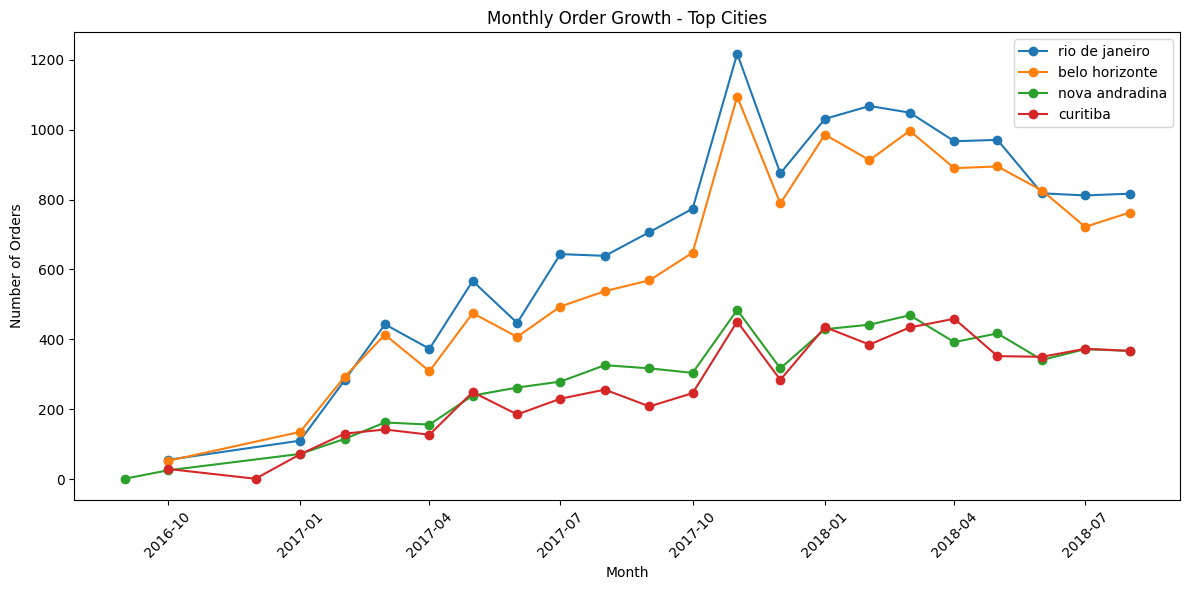

In [110]:
plt.figure(figsize=(12, 6))

for city in top_city:
    city_data = monthly_growth[monthly_growth['geolocation_city'] == city]
    plt.plot(city_data['month_dt'], city_data['order_id'], marker='o', label=city)

plt.title("Monthly Order Growth - Top Cities")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)

plt.legend()
plt.tight_layout()
plt.show()


**Purchase Frequency per Customer**

In [111]:
cust_trx = customers_analysis.groupby("customer_id").agg({
    'order_id':'count'
})

cust_trx

order_id
customer_id                               
00012a2ce6f8dcda20d059ce98491703         1
000161a058600d5901f007fab4c27140         1
0001fd6190edaaf884bcaf3d49edf079         1
0002414f95344307404f0ace7a26f1d5         1
000379cdec625522490c315e70c7a9fb         1
...                                    ...
fffcb937e9dd47a13f05ecb8290f4d3e         1
fffecc9f79fd8c764f843e9951b11341         1
fffeda5b6d849fbd39689bb92087f431         1
ffff42319e9b2d713724ae527742af25         1
ffffa3172527f765de70084a7e53aae8         2

[98666 rows x 1 columns]

In [112]:
count_all_cust = customers_analysis['customer_id'].nunique()
count_all_cust

98666

In [113]:
repeat_customers = cust_trx[cust_trx['order_id'] > 1].shape[0]

prop_repeat = repeat_customers / count_all_cust * 100
print("Customer Repeat Order:", repeat_customers, f"({prop_repeat:.2f}%)")

Customer Repeat Order: 10280 (10.42%)


In [114]:
one_time_customers = cust_trx[cust_trx['order_id'] == 1].shape[0]

prop_one_time = one_time_customers / count_all_cust * 100
print("Customer One-Time Order:", one_time_customers, f"({prop_one_time:.2f}%)")

Customer One-Time Order: 88386 (89.58%)


**Averange Rating by Month**

In [115]:
customers_analysis['review_score'].value_counts()

review_score
5    63626
4    21381
1    14787
3     9544
2     3984
Name: count, dtype: int64

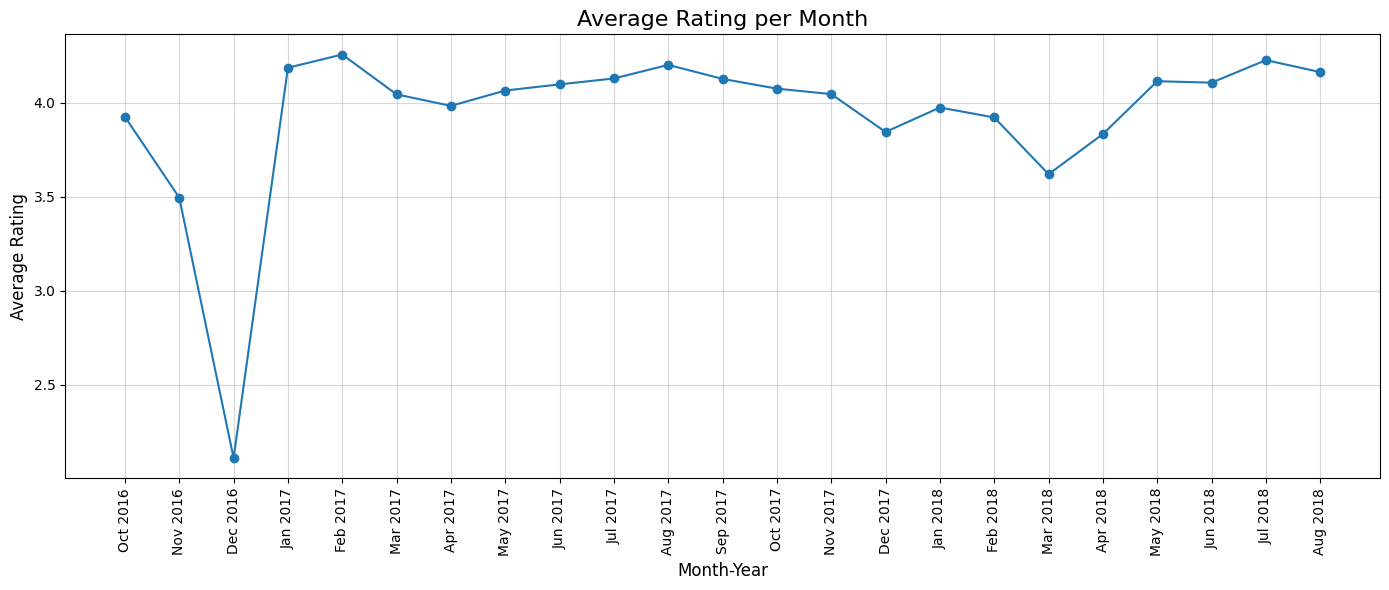

In [116]:
customers_analysis['review_creation_date'] = pd.to_datetime(customers_analysis['review_creation_date'])

customers_analysis['month_year'] = customers_analysis['review_creation_date'].dt.to_period('M')

monthly_rating = (
    customers_analysis.groupby('month_year')['review_score'].mean().reset_index()
)

monthly_rating['month_year'] = monthly_rating['month_year'].dt.to_timestamp()
monthly_rating['month_year_str'] = monthly_rating['month_year'].dt.strftime('%b %Y')

plt.figure(figsize=(14,6))
plt.plot(monthly_rating['month_year_str'], monthly_rating['review_score'], marker='o', linestyle='-')
plt.title("Average Rating per Month", fontsize=16)
plt.xlabel("Month-Year", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.xticks(rotation=90)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

In [117]:
rating_dist = customers_analysis['review_score'].value_counts()
rating_dist

review_score
5    63626
4    21381
1    14787
3     9544
2     3984
Name: count, dtype: int64

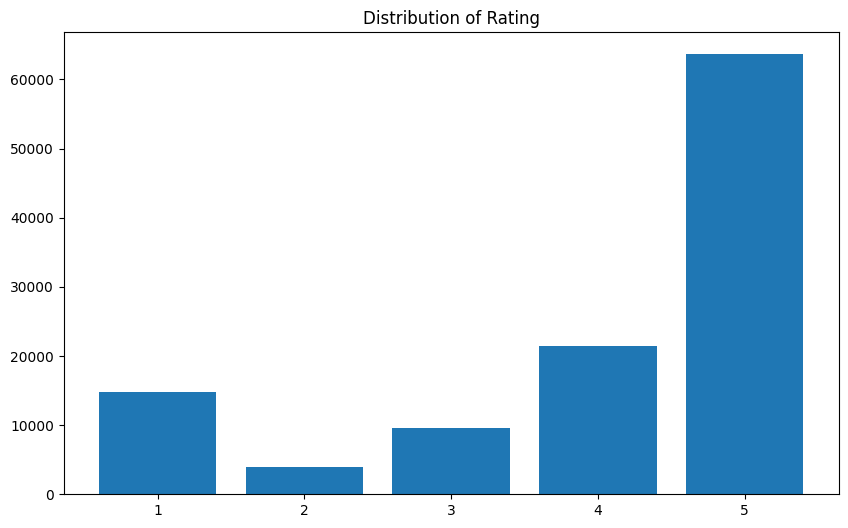

In [118]:
plt.figure(figsize=(10, 6))
plt.bar(rating_dist.index, rating_dist.values)
plt.title('Distribution of Rating')
plt.show()

**Produk Review**

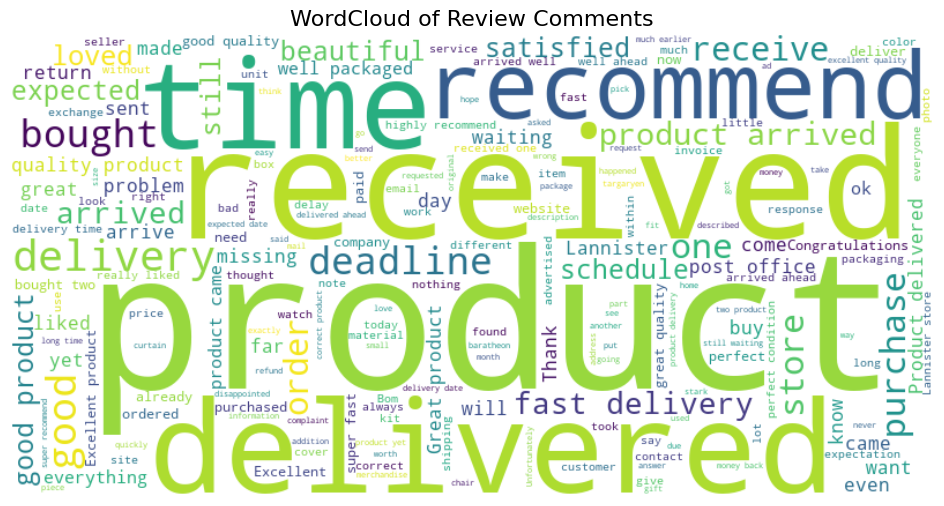

In [119]:
from wordcloud import WordCloud

text = " ".join(str(review) for review in customers_analysis['review_comment_message'].dropna())

# Buat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud of Review Comments", fontsize=16)
plt.show()

In [120]:
review_low_rating = customers_analysis[customers_analysis['review_score'] < 4 ] 
review_low_rating

order_id                       customer_id  \
6       136cce7faa42fdb2cefd53fdc79a6098  ed0271e0b7da060a393796590e7b737a   
8       76c6e866289321a7c93b82b54852dc33  f54a9f0e6b351c431402b8461ea51999   
10      e6ce16cb79ec1d90b1da9085a6118aeb  494dded5b201313c64ed7f100595b95c   
11      e6ce16cb79ec1d90b1da9085a6118aeb  494dded5b201313c64ed7f100595b95c   
21      203096f03d82e0dffbc41ebc2e2bcfb7  d2b091571da224a1b36412c18bc3bbfe   
...                                  ...                               ...   
113302  38e9133ce29f6bbe35aed9c3863dce01  ad312389a098ceff46ce92c4595c06d0   
113304  d692ef54145c9cb3322ec2e5508aa3f4  82ddfcf9438b0cd1117b55ac33184df8   
113311  cfa78b997e329a5295b4ee6972c02979  a2f7428f0cafbc8e59f20e1444b67315   
113319  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
113320  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   

       order_status order_purchase_timestamp    order_approved_at  \
6          invoiced      2017-04-11 12:22:08  2017-04-13 13:25:17   
8         delivered      2017-01-23 18:29:09  2017-01-25 02:50:47   
10        delivered      2017-05-16 19:41:10  2017-05-16 19:50:18   
11        delivered      2017-05-16 19:41:10  2017-05-16 19:50:18   
21        delivered      2017-09-18 14:31:30  2017-09-19 04:04:09   
...             ...                      ...                  ...   
113302    delivered      2017-10-12 20:54:11  2017-10-14 03:28:24   
113304    delivered      2018-03-21 19:47:18  2018-03-21 20:05:26   
113311    delivered      2017-12-20 09:52:41  2017-12-20 10:09:52   
113319    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
113320    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   

       order_delivered_carrier_date order_delivered_customer_date  \
6                               NaN                           NaN   
8               2017-01-26 14:16:31           2017-02-02 14:08:10   
10              2017-05-18 11:40:40           2017-05-29 11:18:31   
11              2017-05-18 11:40:40           2017-05-29 11:18:31   
21              2017-10-06 17:50:03           2017-10-09 22:23:46   
...                             ...                           ...   
113302          2017-10-17 17:04:42           2017-11-21 17:06:59   
113304          2018-03-22 21:11:58           2018-04-11 00:48:31   
113311          2017-12-20 20:25:25           2018-01-26 15:45:14   
113319          2018-01-12 15:35:03           2018-01-25 23:32:54   
113320          2018-01-12 15:35:03           2018-01-25 23:32:54   

       order_estimated_delivery_date                customer_unique_id  \
6                2017-05-09 00:00:00  36edbb3fb164b1f16485364b6fb04c73   
8                2017-03-06 00:00:00  39382392765b6dc74812866ee5ee92a7   
10               2017-06-07 00:00:00  f2a85dec752b8517b5e58a06ff3cd937   
11               2017-06-07 00:00:00  f2a85dec752b8517b5e58a06ff3cd937   
21               2017-09-28 00:00:00  d699688533772c15a061e8ce81cb56df   
...                              ...                               ...   
113302           2017-10-31 00:00:00  a3983b8b6b679c9f645e6ef9517ac98d   
113304           2018-04-09 00:00:00  397cd1affbb66fa8f76e8ac24685440a   
113311           2018-01-18 00:00:00  a49e8e11e850592fe685ae3c64b40eca   
113319           2018-02-15 00:00:00  5097a5312c8b157bb7be58ae360ef43c   
113320           2018-02-15 00:00:00  5097a5312c8b157bb7be58ae360ef43c   

        customer_zip_code_prefix     customer_city customer_state  \
6                          98900        santa rosa             RS   
8                          99655      faxinalzinho             RS   
10                         20780    rio de janeiro             RJ   
11                         20780    rio de janeiro             RJ   
21                          4001         sao paulo             SP   
...                          ...               ...            ...   
113302                     14802        araraquara             SP

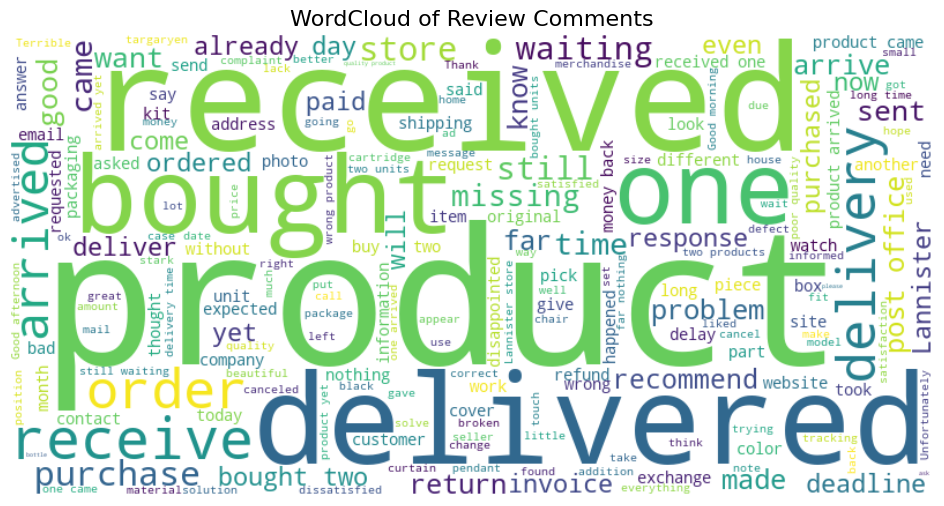

In [121]:


text_low_rating = " ".join(str(review) for review in review_low_rating['review_comment_message'].dropna())

# Buat WordCloud
wordcloud_low_rating = WordCloud(width=800, height=400, background_color='white').generate(text_low_rating)

# Plot
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_low_rating, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud of Review Comments", fontsize=16)
plt.show()

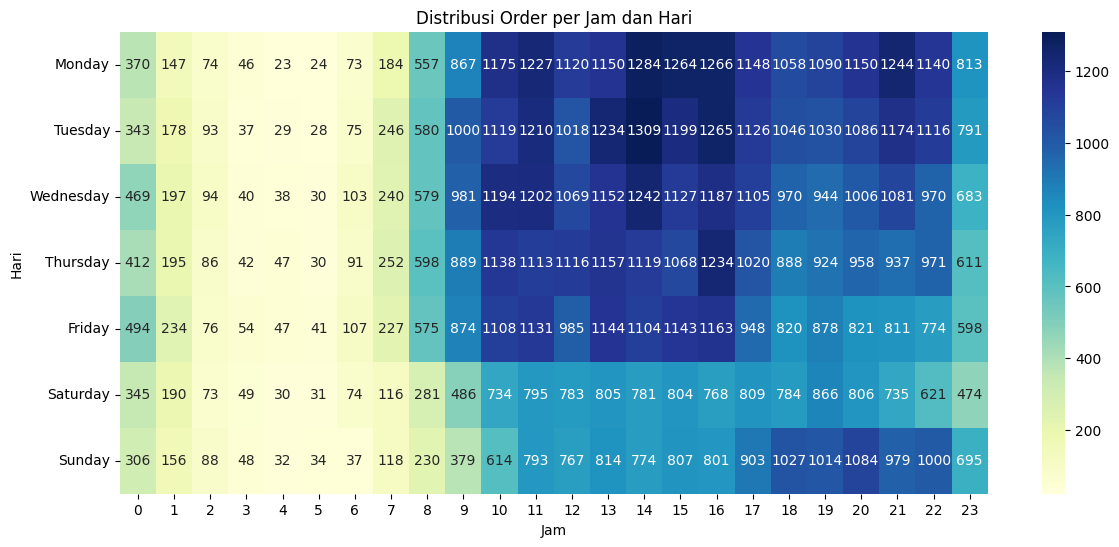

In [126]:
customers_analysis['order_purchase_timestamp'] = pd.to_datetime(customers_analysis['order_purchase_timestamp'])

# ambil hari dan jam
customers_analysis['day_of_week'] = customers_analysis['order_purchase_timestamp'].dt.day_name()
customers_analysis['hour'] = customers_analysis['order_purchase_timestamp'].dt.hour

# pivot table: jumlah order per hari & jam
heatmap_data = (
    customers_analysis
    .groupby(['day_of_week', 'hour'])['order_id']
    .count()
    .reset_index()
    .pivot(index='day_of_week', columns='hour', values='order_id')
)

# urutkan hari biar rapi (Senin-Minggu)
order_days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
heatmap_data = heatmap_data.reindex(order_days)

# plot heatmap
plt.figure(figsize=(14,6))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt="d")
plt.title("Distribusi Order per Jam dan Hari")
plt.xlabel("Jam")
plt.ylabel("Hari")
plt.show()